In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Salary Price Predication/Jobs_NYC_Postings.csv')
df.head(10)

Job ID                          Agency Posting Type  # Of Positions  \
0  623668   DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193   DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094   DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593    DEPARTMENT OF TRANSPORTATION     External               1   
4  624937   DEPT OF HEALTH/MENTAL HYGIENE     External               1   
5  628726     TAXI & LIMOUSINE COMMISSION     Internal               1   
6  621367  DEPT OF ENVIRONMENT PROTECTION     Internal               2   
7  627742  HOUSING PRESERVATION & DVLPMNT     Internal               1   
8  605344  NYC DEPT OF VETERANS' SERVICES     Internal               1   
9  602435     HRA/DEPT OF SOCIAL SERVICES     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   
5                         DevOps Engineering Manager   
6                               Stormwater Inspector   
7                                       Case Manager   
8                          Site Reliability Engineer   
9                              SENIOR PROJECT LEADER   

              Civil Service Title      Title Classification Title Code No  \
0         CITY RESEARCH SCIENTIST         Non-Competitive-5         21744   
1  ADMINISTRATIVE PROJECT MANAGER             Competitive-1         8300B   
2  ADMINISTRATIVE PROJECT MANAGER             Competitive-1         8300B   
3             PROCUREMENT ANALYST             Competitive-1         12158   
4         CITY RESEARCH SCIENTIST         Non-Competitive-5         21744   
5           IT PROJECT SPECIALIST  Pending Classification-2         06797   
6         PROJECT MANAGER INTERN#             Competitive-1         22425   
7             COMMUNITY ASSOCIATE         Non-Competitive-5         56057   
8             COMMUNITY ASSOCIATE         Non-Competitive-5         56057   
9  COMPUTER SPECIALIST (SOFTWARE)             Competitive-1         13632   

  Level                                       Job Category  ...  \
0    02  Constituent Services & Community Programs Heal...  ...   
1    00  Policy, Research & Analysis Public Safety, Ins...  ...   
2    00              Engineering, Architecture, & Planning  ...   
3    02                 Finance, Accounting, & Procurement  ...   
4    03  Constituent Services & Community Programs Heal...  ...   
5    00                      Technology, Data & Innovation  ...   
6    00  Green Jobs Engineering, Architecture, & Planni...  ...   
7    00          Constituent Services & Community Programs  ...   
8    00                      Technology, Data & Innovation  ...   
9    02      Technology, Data & Innovation Social Services  ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2                                                NaN   
3  The City of New York is an inclusive equal opp...   
4                                                NaN   
5                                                NaN   
6  The City of New York is an inclusive equal opp...   
7                                                NaN   
8                                                NaN   
9  The Human Resources Administration/Department ...   

                                            To Apply            Hours/Shift  \
0  Apply online with a cover letter to https://a1...                    NaN   
1  For City Employees, please go to Employee Self...               35 Hours   
2                                                NaN                    NaN   
3  Resumes may be submitted electronically using ...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [5]:
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Requirement               0
Posting Date                        0
Post Until                       3616
Posting Updated                     0
Process Date                        0
dtype: int64

## NAN Holdling columns names

*  Minimum Qual Reqirements : The qualifications or criteria applicants must meet to be eligible for the position.
*  Preferred Skills : Any additional skills or qualifications that are desirable but not mandatory.
*  Additional Information : Any other relevant details about the job.
*  Full-Time/Part-Time indicator.
*  Post Until : The deadline for submitting applications.
*  Recruitment Contact : Contact details for inquiries related to recruitment.
*  Work Location 1: The physical location where the job is based.
*  To Apply : Instructions on how to apply for the position.
*  House/Shift : Information about work hours or shifts.

**This columns are not related to our goal drop all 9 columns.**


# Handling NAN values

In [6]:
df.shape

(5120, 30)

In [7]:
# Drop those columns that have to many null values
threshold = int(0.5* len(df)) # Those columns are remove that have 50% or more than null values
df= df.dropna(thresh=threshold,axis=1)

In [8]:
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Residency Requirement               0
Posting Date                        0
Posting Updated                     0
Process Date                        0
dtype: int64

In [9]:
df.shape

(5120, 26)

# **Catergrize columns**

In [11]:
#Categorical Data Check
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Job ID', '# Of Positions', 'Salary Range From', 'Salary Range To']

We have 22 categorical features : ['Agency', 'Posting Type', 'Business Title', 'Civil Service Title', 'Title Classification', 'Title Code No', 'Level', 'Job Category', 'Full-Time/Part-Time indicator', 'Career Level', 'Salary Frequency', 'Work Location', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Residency Requirement', 'Posting Date', 'Posting Updated', 'Process Date']


# Column Type
-----------------------------
* Numrerical columns:- Job ID, avaliable_positions, Salary Range From, Salary Range To
* Categorical columns:-Agency, Posting Type, Business Title, Civil Service Title, Title Classification, Title Code No, Level, Job Category, Job_type, Career Level, Salary Frequency, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Residency Requirement, Posting Date, Posting Updated, Process Date

# Handling Missing values of Categorical columns



In [12]:
missing_categorical_columns=['Additional Information','To Apply','Preferred Skills','Minimum Qual Requirements','Full-Time/Part-Time indicator']
for i in missing_categorical_columns:
  if i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Job ID                           0
Agency                           0
Posting Type                     0
# Of Positions                   0
Business Title                   0
Civil Service Title              0
Title Classification             0
Title Code No                    0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Division/Work Unit               0
Job Description                  0
Minimum Qual Requirements        0
Preferred Skills                 0
Additional Information           0
To Apply                         0
Residency Requirement            0
Posting Date                     0
Posting Updated                  0
Process Date                     0
dtype: int64

# Univariate Columns
- Numrerical columns:- Job ID, avaliable_positions, Salary Range From, Salary Range To

# Job ID

Report

There is no null value in this column

In [14]:
df['Job ID'].value_counts()

Job ID
627043    3
628110    3
512652    3
542360    3
626609    3
         ..
599536    1
613494    1
605834    1
622684    1
574334    1
Name: count, Length: 2626, dtype: int64

In [15]:
df['Job ID'].isnull().sum()

0

In [16]:
df.head()

Job ID                         Agency Posting Type  # Of Positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External               1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal               1   
3  580593   DEPARTMENT OF TRANSPORTATION     External               1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External               1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
3             PROCUREMENT ANALYST        Competitive-1         12158    02   
4         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

               Division/Work Unit  \
0  Maternal, Infant, & Repr. Hlth   
1        Pub Bldgs/Transportation   
2  PUB BLDGS/CPD/Library/Brooklyn   
3       Bridge Repair/352 Kent St   
4      Dis-Div. Mgmt. & Sys Coord   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   
1  Hours: Full-Time â 35 Hours Work Location: 3...   
2  Hours: Full-Time â 35 Hours Work Location: 3...   
3  Reporting directly to the Director of Bridge R...   
4  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   
1  1. A baccalaureate degree from an accredited c...   
2  1. A baccalaureate degree from an accredited c...   
3  1. A baccalaureate degree from an accredited c...   
4  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   
1  Candidates must have excellent management skil...   
2  Candidates should have at least six years of e...   
3  Familiar with and knowledge of Procurement sys...   
4  At least five yearsâ work experience in the ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2  Authorization to work in the United States is ...   
3  The City of New York is an inclusive equal opp...   
4  Authorization to work in the United States is ...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   
1  For City Employees, please go to Employee Self...   
2                        Click the Apply Now button.   
3  Resumes may be submitted electronically using ...   
4  Apply online with a cover letter to https://a1...   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   
1  New York City Residency is not required for th...   10/03/2023   
2  New York City Residency is not required for th...   02/01/2024   
3  New York City residency is generally required ...   04/04/2023   
4  New York City residency is generally required ...   02/06/2024   

  Posting Updated Process Date  
0      01/23/2024   03/04/2024  
1 

# # Of Positions

Reports
- Rename column name to available_position
- Null value is not avaliable

In [17]:
df['# Of Positions'].value_counts()

# Of Positions
1      4099
2       434
3       156
4        88
5        83
7        39
6        38
10       34
8        31
15       23
9        13
20        7
18        7
70        6
11        6
60        5
13        5
25        4
16        4
24        4
12        4
19        3
40        3
98        2
21        2
46        2
17        2
81        2
150       2
26        2
14        2
32        2
30        2
34        2
75        2
Name: count, dtype: int64

In [18]:
df['# Of Positions'].isnull().sum()

0

In [19]:
df=df.rename(columns={'# Of Positions': 'avaliable_positions'})

# Salary Range From

Report

- Data type already in integer format
- Null value is not present

In [20]:
df['Salary Range From'].value_counts()

Salary Range From
59116.0000    179
62370.0000    140
58700.0000    129
58682.0000     91
82506.0000     90
             ... 
98282.0000      1
89818.0000      1
69435.0000      1
23.7800         1
22.7189         1
Name: count, Length: 559, dtype: int64

In [21]:
df['Salary Range From'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Salary Range From
Non-Null Count  Dtype  
--------------  -----  
5120 non-null   float64
dtypes: float64(1)
memory usage: 40.1 KB


In [22]:
df['Salary Range From'] = df['Salary Range From'].astype('int64')
df['Salary Range From'].dtypes

dtype('int64')

# Salary Range To
Report
- Data type already in integer format
- Null value is not present

In [23]:
df['Salary Range To'].value_counts()

Salary Range To
71726.00     75
208826.00    73
91768.00     73
93587.00     72
173486.00    69
             ..
94543.00      1
23.78         1
45.01         1
87548.00      1
136951.00     1
Name: count, Length: 748, dtype: int64

In [24]:
df['Salary Range To'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Salary Range To
Non-Null Count  Dtype  
--------------  -----  
5120 non-null   float64
dtypes: float64(1)
memory usage: 40.1 KB


In [25]:
df['Salary Range To'] = df['Salary Range To'].astype('int64')
df['Salary Range To'].dtypes

dtype('int64')

# Merging salary Range To and Salary Range From column

In [26]:
# Calculate the target variable 'Salary Range' (mean of 'Salary Range From' and 'Salary Range To')
df['Salary_Range_Mean'] = (df['Salary Range From'] + df['Salary Range To']) / 2

In [27]:
df.head()

Job ID                         Agency Posting Type  avaliable_positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External                    1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal                    1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal                    1   
3  580593   DEPARTMENT OF TRANSPORTATION     External                    1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External                    1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
3             PROCUREMENT ANALYST        Competitive-1         12158    02   
4         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   
1  Hours: Full-Time â 35 Hours Work Location: 3...   
2  Hours: Full-Time â 35 Hours Work Location: 3...   
3  Reporting directly to the Director of Bridge R...   
4  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   
1  1. A baccalaureate degree from an accredited c...   
2  1. A baccalaureate degree from an accredited c...   
3  1. A baccalaureate degree from an accredited c...   
4  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   
1  Candidates must have excellent management skil...   
2  Candidates should have at least six years of e...   
3  Familiar with and knowledge of Procurement sys...   
4  At least five yearsâ work experience in the ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2  Authorization to work in the United States is ...   
3  The City of New York is an inclusive equal opp...   
4  Authorization to work in the United States is ...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   
1  For City Employees, please go to Employee Self...   
2                        Click the Apply Now button.   
3  Resumes may be submitted electronically using ...   
4  Apply online with a cover letter to https://a1...   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   
1  New York City Residency is not required for th...   10/03/2023   
2  New York City Residency is not required for th...   02/01/2024   
3  New York City residency is generally required ...   04/04/2023   
4  New York City residency is generally required ...   02/06/2024   

  Posting Updated Process Date Salary_Range_Mean  
0      01/23/2024   03/04/2024           88694.0  
1      11/29/2023   03/04/2024           96626.0  
2      02/01/2024   03/04/2024           75043.5  
3      04/04/2023   03/04/2024           66851.0  
4     

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   avaliable_positions            5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5120 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   i

In [29]:
# Drop the original salary columns if not needed
df.drop(['Salary Range From', 'Salary Range To'], axis=1, inplace=True)


df.head()

Job ID                         Agency Posting Type  avaliable_positions  \
0  623668  DEPT OF HEALTH/MENTAL HYGIENE     External                    1   
1  608193  DEPT OF DESIGN & CONSTRUCTION     Internal                    1   
2  625094  DEPT OF DESIGN & CONSTRUCTION     Internal                    1   
3  580593   DEPARTMENT OF TRANSPORTATION     External                    1   
4  624937  DEPT OF HEALTH/MENTAL HYGIENE     External                    1   

                                      Business Title  \
0  Research Analyst, IMAT, Bureau of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, HIV Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    02   
1  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
2  ADMINISTRATIVE PROJECT MANAGER        Competitive-1         8300B    00   
3             PROCUREMENT ANALYST        Competitive-1         12158    02   
4         CITY RESEARCH SCIENTIST    Non-Competitive-5         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

                                     Job Description  \
0  Established in 1805, the New York City Departm...   
1  Hours: Full-Time â 35 Hours Work Location: 3...   
2  Hours: Full-Time â 35 Hours Work Location: 3...   
3  Reporting directly to the Director of Bridge R...   
4  Established in 1805, the New York City Departm...   

                           Minimum Qual Requirements  \
0  1.  For Assignment Level I (only physical, bio...   
1  1. A baccalaureate degree from an accredited c...   
2  1. A baccalaureate degree from an accredited c...   
3  1. A baccalaureate degree from an accredited c...   
4  1.  For Assignment Level I (only physical, bio...   

                                    Preferred Skills  \
0  Experience in quantitative research methods an...   
1  Candidates must have excellent management skil...   
2  Candidates should have at least six years of e...   
3  Familiar with and knowledge of Procurement sys...   
4  At least five yearsâ work experience in the ...   

                              Additional Information  \
0  **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...   
1  Authorization to work in the United States is ...   
2  Authorization to work in the United States is ...   
3  The City of New York is an inclusive equal opp...   
4  Authorization to work in the United States is ...   

                                            To Apply  \
0  Apply online with a cover letter to https://a1...   
1  For City Employees, please go to Employee Self...   
2                        Click the Apply Now button.   
3  Resumes may be submitted electronically using ...   
4  Apply online with a cover letter to https://a1...   

                               Residency Requirement Posting Date  \
0  New York City residency is generally required ...   01/23/2024   
1  New York City Residency is not required for th...   10/03/2023   
2  New York City Residency is not required for th...   02/01/2024   
3  New York City residency is generally required ...   04/04/2023   
4  New York City residency is generally required ...   02/06/2024   

  Posting Updated Process Date Salary_Range_Mean  
0      01/23/2024   03/04/2024           88694.0  
1      11/29/2023   03/04/2024           96626.0  
2      02/01/2024   03/04/2024           75043.5  
3      04/04/2023   03/04/2024           66851.0  
4     

# Univariate
**Categorical columns**:-Agency, Posting Type, Business Title, Civil Service Title, Title Classification, Title Code No, Level, Job Category, Job_type, Career Level, Salary Frequency, Work Location, Division/Work Unit, Job Description, Minimum Qual Requirements, Preferred Skills, Additional Information, To Apply, Residency Requirement, Posting Date, Posting Updated, Process Date


# **Process Date**
 **Report**
 1. value of this column are same.

In [30]:
df['Process Date']

0       03/04/2024
1       03/04/2024
2       03/04/2024
3       03/04/2024
4       03/04/2024
           ...    
5115    03/04/2024
5116    03/04/2024
5117    03/04/2024
5118    03/04/2024
5119    03/04/2024
Name: Process Date, Length: 5120, dtype: object

In [31]:
df['Process Date'] = pd.to_datetime(df['Process Date'])

In [32]:
df['Process Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Process Date
Non-Null Count  Dtype         
--------------  -----         
5120 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.1 KB


# **Posting Date**

In [33]:
df['Posting Date']

0       01/23/2024
1       10/03/2023
2       02/01/2024
3       04/04/2023
4       02/06/2024
           ...    
5115    01/24/2023
5116    09/23/2022
5117    01/05/2023
5118    10/20/2023
5119    06/21/2023
Name: Posting Date, Length: 5120, dtype: object

In [34]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'])

In [35]:
df['Posting Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Posting Date
Non-Null Count  Dtype         
--------------  -----         
5120 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.1 KB


# **Posting Updated**

In [36]:
df['Posting Updated']

0       01/23/2024
1       11/29/2023
2       02/01/2024
3       04/04/2023
4       02/21/2024
           ...    
5115    11/16/2023
5116    09/29/2022
5117    01/26/2023
5118    10/20/2023
5119    06/29/2023
Name: Posting Updated, Length: 5120, dtype: object

In [37]:
df['Posting Updated']= pd.to_datetime(df['Posting Updated'])

In [38]:
df['Posting Updated'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Posting Updated
Non-Null Count  Dtype         
--------------  -----         
5120 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.1 KB


# **Residency Requirement**

In [39]:
df['Residency Requirement']

0       New York City residency is generally required ...
1       New York City Residency is not required for th...
2       New York City Residency is not required for th...
3       New York City residency is generally required ...
4       New York City residency is generally required ...
                              ...                        
5115    New York City Residency is not required for th...
5116    New York City Residency is not required for th...
5117    New York City residency is generally required ...
5118     City Residency is not required for this position
5119    New York City Residency is not required for th...
Name: Residency Requirement, Length: 5120, dtype: object

In [40]:
import re

# Define a regular expression to match special characters
special_chars = r'[^a-zA-Z0-9\s]'

# Remove special characters from the 'Residency Requirement' column
df['Residency Requirement'] = df['Residency Requirement'].str.replace(special_chars, '', regex=True)

In [41]:
# lower case
df['Residency Requirement']  = df['Residency Requirement'] .str.lower()

In [42]:
# Remove extra spaces
df['Residency Requirement'].str.strip()

0       new york city residency is generally required ...
1       new york city residency is not required for th...
2       new york city residency is not required for th...
3       new york city residency is generally required ...
4       new york city residency is generally required ...
                              ...                        
5115    new york city residency is not required for th...
5116    new york city residency is not required for th...
5117    new york city residency is generally required ...
5118     city residency is not required for this position
5119    new york city residency is not required for th...
Name: Residency Requirement, Length: 5120, dtype: object

In [43]:
df['Residency Requirement'].value_counts()

Residency Requirement
new york city residency is generally required within 90 days of appointment however city employees in certain titles who have worked for the city for 2 continuous years may also be eligible to reside in nassau suffolk putnam westchester rockland or orange county to determine if the residency requirement applies to you please discuss with the agency representative at the time of interview                                                                                                                                                                                                                                                                                                                                                                                                               2793
new york city residency is not required for this position                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1603
nycha has no residency requirements                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   305
city residency is not required for this position                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      157
new york state residency is required on the first day of employment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    55
new york

In [44]:
df['Residency Requirement']

0       new york city residency is generally required ...
1       new york city residency is not required for th...
2       new york city residency is not required for th...
3       new york city residency is generally required ...
4       new york city residency is generally required ...
                              ...                        
5115    new york city residency is not required for th...
5116    new york city residency is not required for th...
5117    new york city residency is generally required ...
5118     city residency is not required for this position
5119    new york city residency is not required for th...
Name: Residency Requirement, Length: 5120, dtype: object

# **To Apply**

**Report**
1. Not able to remove URL
2. Drop the column  

In [45]:
df['To Apply']

0       Apply online with a cover letter to https://a1...
1       For City Employees, please go to Employee Self...
2                             Click the Apply Now button.
3       Resumes may be submitted electronically using ...
4       Apply online with a cover letter to https://a1...
                              ...                        
5115    Apply online with a cover letter to https://a1...
5116    Resumes may be submitted electronically using ...
5117    For City employees: Go to Employee Self-Servic...
5118    For City employees, to complete your applicati...
5119    For City Employees, please go to Employee Self...
Name: To Apply, Length: 5120, dtype: object

In [46]:
# Remove extra spaces
df['To Apply'] .str.strip()

0       Apply online with a cover letter to https://a1...
1       For City Employees, please go to Employee Self...
2                             Click the Apply Now button.
3       Resumes may be submitted electronically using ...
4       Apply online with a cover letter to https://a1...
                              ...                        
5115    Apply online with a cover letter to https://a1...
5116    Resumes may be submitted electronically using ...
5117    For City employees: Go to Employee Self-Servic...
5118    For City employees, to complete your applicati...
5119    For City Employees, please go to Employee Self...
Name: To Apply, Length: 5120, dtype: object

In [47]:
# code to remove a URL
df['To Apply'] = df['To Apply'].str.replace(r"http://\S+|www\.\S+",'')

In [48]:
df['To Apply'].value_counts()

To Apply
Click the Apply Now button.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           596
Click Apply Now button.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               144
For City Employees, please go to Employee Self Service (ESS), click on Recruiting Activities/Careers and Search for Job ID# listed above. For all other applicants, please go to http://www.nyc.gov/jobs,go to Search for Open NYC Jobs and click on Non-Employee Login to search for Job ID# listed above. Do not e-mail, mail, or fax your resume to DDC directly. No phone calls will be accepted.                                                                                                                                                 134
To apply click Apply Now                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              132
Click the Apply button.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               131
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ... 
Go to cityjobs.nyc.gov and search for Job ID# 627089.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1
APPLICATIONS MUST BE SUBMITTED ELECTRONICALLY USING ONE OF THE OPTIONS BELOW:  For current city employees, go to Employee Self Service (ESS), Recruiting Activities, Careers and search for Job ID# 559711  For all other applica

In [49]:
import string

In [50]:
def remove_puctuation(text):

    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')

    return text

In [51]:
df['To Apply']  = df['To Apply'] .apply(remove_puctuation)
df['To Apply'] .head()

0    Apply online with a cover letter to httpsa127j...
1    For City Employees please go to Employee Self ...
2                           Click the Apply Now button
3    Resumes may be submitted electronically using ...
4    Apply online with a cover letter to httpsa127j...
Name: To Apply, dtype: object

In [52]:
#df.drop(columns=['To Apply'], axis=1, inplace=True) # Drop the 'To Apply' column from the DataFrame


# **Additional Information**

In [53]:
df['Additional Information']

0       **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...
1       Authorization to work in the United States is ...
2       Authorization to work in the United States is ...
3       The City of New York is an inclusive equal opp...
4       Authorization to work in the United States is ...
                              ...                        
5115    **Must follow all safety, security, Blood-born...
5116    The City of New York is an inclusive equal opp...
5117    The City of New York offers a comprehensive be...
5118    Authorization to work in the United States is ...
5119    Authorization to work in the United States is ...
Name: Additional Information, Length: 5120, dtype: object

In [54]:
df['Additional Information'].value_counts()

Additional Information
Authorization to work in the United States is required for this position. NYC Department of Design and Construction does not provide sponsorship for international employees. Applicants are responsible for ensuring that they meet all qualifying requirements for this position, at the time of application.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1982
Appointments are subject to OMB approval.  For additional information about DEP, visit www.nyc.gov/dep.  DEP is an equal opportunity employer with a strong commitment to the diversity of our organization and workforce. Your voluntary response to the NYCAPS on-line application section for referral information will assist us tremendously in our ability to track the success of our outreach and recruitment efforts. Please be sure to indicate your source of referral to this job.                                                                                                                                                                                                                                                                                                                              

In [55]:
df['Additional Information'].str.strip()

0       **IMPORTANT NOTES TO ALL CANDIDATES:  Please n...
1       Authorization to work in the United States is ...
2       Authorization to work in the United States is ...
3       The City of New York is an inclusive equal opp...
4       Authorization to work in the United States is ...
                              ...                        
5115    **Must follow all safety, security, Blood-born...
5116    The City of New York is an inclusive equal opp...
5117    The City of New York offers a comprehensive be...
5118    Authorization to work in the United States is ...
5119    Authorization to work in the United States is ...
Name: Additional Information, Length: 5120, dtype: object

In [56]:
import string

In [57]:
def remove_puctuation(text):

    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')

    return text

In [58]:
df['Additional Information'] = df['Additional Information'].apply(remove_puctuation)
df['Additional Information'].head()

0    IMPORTANT NOTES TO ALL CANDIDATES  Please note...
1    Authorization to work in the United States is ...
2    Authorization to work in the United States is ...
3    The City of New York is an inclusive equal opp...
4    Authorization to work in the United States is ...
Name: Additional Information, dtype: object

In [59]:
# Remove URL
#df['Additional Information'] = df['Additional Information'].str.replace(r"https?://\S+|www\.\S+",'')

In [60]:
# Remove special characters from the 'Preferred Skills' column
df['Additional Information'] = df['Additional Information'].str.replace(special_chars, '', regex=True)

In [61]:
df['Additional Information'].value_counts()

Additional Information
Authorization to work in the United States is required for this position NYC Department of Design and Construction does not provide sponsorship for international employees Applicants are responsible for ensuring that they meet all qualifying requirements for this position at the time of application                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1982
Appointments are subject to OMB approval  For additional information about DEP visit wwwnycgovdep  DEP is an equal opportunity employer with a strong commitment to the diversity of our organization and workforce Your voluntary response to the NYCAPS online application section for referral information will assist us tremendously in our ability to track the success of our outreach and recruitment efforts Please be sure to indicate your source of referral to this job                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       146
In addition the Human Resources AdministrationDepartment of Social Services offers competitive salaries and the following benefits Generous Pension Plans The New York Employees Retirement System  401k and 457 Roths Retirement Savings Programs US Savings Bonds Flexible Spending Program Health Benefits Dental Vision Coverage Prescription Drug Program Training and Professional Development Opportunity for Scholarship College Savings Program Paid Holidays and Generous Annual Leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            90
The City of New York offers a comprehensive benefits package including health insurance for the employee and hisher spouse or domestic partner and unemancipated children under age 26 union benefits such as dental and vision coverage paid annual leave and sick leave paid holidays a pension and optional savings and pretax programs such as Deferred Compensation IRA and a flexible spending account                                

In [62]:
# Drop the 'Additional Information' column from the DataFrame

#df.drop(columns=['Additional Information'], axis=1, inplace=True)

# **Preferred Skills**

In [63]:
df['Preferred Skills']

0       Experience in quantitative research methods an...
1       Candidates must have excellent management skil...
2       Candidates should have at least six years of e...
3       Familiar with and knowledge of Procurement sys...
4       At least five yearsâ work experience in the ...
                              ...                        
5115    Expertise in Planning and Program Development....
5116    Ability to communicate effectively in verbal a...
5117    â¢\tAt least ten (10) years of professional s...
5118    â¢ Experience with Welfare Management System ...
5119    Candidates should possess excellent verbal and...
Name: Preferred Skills, Length: 5120, dtype: object

In [64]:
# Remove special characters from the 'Preferred Skills' column
df['Preferred Skills'] = df['Preferred Skills'].str.replace(special_chars, '', regex=True)

In [65]:
# Remove extra spaces
df['Preferred Skills'].str.strip()

0       Experience in quantitative research methods an...
1       Candidates must have excellent management skil...
2       Candidates should have at least six years of e...
3       Familiar with and knowledge of Procurement sys...
4       At least five years work experience in the HIV...
                              ...                        
5115    Expertise in Planning and Program Development ...
5116    Ability to communicate effectively in verbal a...
5117    At least ten 10 years of professional supervis...
5118    Experience with Welfare Management System WMS ...
5119    Candidates should possess excellent verbal and...
Name: Preferred Skills, Length: 5120, dtype: object

In [66]:
df['Preferred Skills'] = df['Preferred Skills'].apply(remove_puctuation)
df['Preferred Skills'].head()

0    Experience in quantitative research methods an...
1    Candidates must have excellent management skil...
2    Candidates should have at least six years of e...
3    Familiar with and knowledge of Procurement sys...
4    At least five years work experience in the HIV...
Name: Preferred Skills, dtype: object

In [67]:
# remove html tags
df['Preferred Skills']= df['Preferred Skills'].str.replace(r'<.*?>','')

In [68]:
df['Preferred Skills'] = df['Preferred Skills'].str.lower()

In [69]:
df['Preferred Skills'].value_counts()

Preferred Skills
 experience with welfare management system wms cash assistance snap  medicaid    paperless office system pos new york city way nycway paperless alternative module    pam hra one viewer electronic payment processing information control eppic scanning    indexing enterprise data warehouse edw systematic alien verification for entitlements save    and state online query solq good in math oral  written communication skills computer    literate with strong knowledge in excel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1247
candidate should possess excellent organizational verbal and written skills with the ability to multitask various projects proficiency in microsoft office is preferred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               20
 experience with welfare management system wms cash assistance snap  medicaid    paperless office system pos new york city way nycway paperless alternative    module pam hra one viewer electronic payment processing information control    eppic scanning indexing enterprise data warehouse edw systematic alien    verification for entitlements save and state online query solq    good in math oral  written communication skills computer literate with strong knowledge    in excel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         20
strong communication analytic and observational skills ability to deduce potential impacts of conditions or assess risk writing skills including the ability to adequately describe observations in detail computer skills including ms office and the use of mobile computing devices                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# **Minimum Qual Requirements**

In [70]:
df['Minimum Qual Requirements']

0       1.  For Assignment Level I (only physical, bio...
1       1. A baccalaureate degree from an accredited c...
2       1. A baccalaureate degree from an accredited c...
3       1. A baccalaureate degree from an accredited c...
4       1.  For Assignment Level I (only physical, bio...
                              ...                        
5115    1. A Bachelorâs of Science degree in Nursing...
5116    (1) Four (4) years of full-time, satisfactory ...
5117    1.\tA Bachelorâs Degree from an accredited c...
5118    1. A baccalaureate degree from an accredited c...
5119    1.  A baccalaureate degree from an accredited ...
Name: Minimum Qual Requirements, Length: 5120, dtype: object

In [71]:
# Remove special characters from the 'Preferred Skills' column
df['Minimum Qual Requirements']= df['Minimum Qual Requirements'].str.replace(special_chars, '', regex=True)

In [72]:
# prompt: remove whitespace

df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.strip()


In [73]:
df['Minimum Qual Requirements'].value_counts()

Minimum Qual Requirements
1 A baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above or  2 High school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above or  3 Education andor experience which is equivalent to 1 or 2 above However all candidates must have at least one year of experience as described in 1 above                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   312
1  For Assignment Level I only physical biological and environmental sciences and public health A masters degree from an accredited college or university with a specialization in an appropriate field of physical biological or environmental science or in public health  To be appointed to Assignment Level II and above candidates must have  1 A doctorate degree from an accredited college or university with specialization in an appropriate field of physical biological environmental or social science and one year of fulltime experience in a responsible supervisory administrative or research capacity in the appropriate field of specialization or  2 A masters degree from an accredited college or university with specialization in an appropriate field of physical biological environmental or social science and three years of responsible fulltime research experience in the appropriate field of specialization or  3 Education andor experience which is equivalent to 1 or 2 above However all candidates must have at least a masters degree in an appropriate field of specialization and at least two years of experience described in 2 above Two years as a City Research Scientist Level I can be substituted for the experience required in 1 and 2 above    NOTE  Probationary Period  Appointments to this position are subject to a minimum probationary period of one year                                                            236
1 A baccalaureate degree from an accredited college and three years of satisfactory fulltime progressively responsible  clericaladministrative  experience one year of which must have been in an administrative capacity or supervising staff performing  clericaladministrative  work of more than moderate difficulty  or  2 An associate degree or 60 semester credits from an accredited college and four years of satisfactory fulltime progressively responsible  clericaladministrative  experience including one year of the administrative supervisory experience described in  1  above  or  3 A fouryear high school diploma or its educational equivalent approved by a States department of education or a recognized accrediting organization and five years of satisfactory fulltime progressively responsible  clericaladministrative  experience including one year of the administrative supervisory experience as described in  1  above  4 Education andor experience equivalent to  1  2  or  3  above  However all candidates must possess the one year of administrative or supervisory experience as described in  1  above  Educ

In [74]:
from textblob import TextBlob

In [75]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [76]:
#df['Minimum Qual Requirements'].apply(spelling_correction)

#  **Job Description**


In [77]:
df['Job Description']

0       Established in 1805, the New York City Departm...
1       Hours: Full-Time â 35 Hours Work Location: 3...
2       Hours: Full-Time â 35 Hours Work Location: 3...
3       Reporting directly to the Director of Bridge R...
4       Established in 1805, the New York City Departm...
                              ...                        
5115    *** OPEN TO APPLICANTS WHO ARE PERMANENT IN TH...
5116    This position is for Engineer-In-Charge servin...
5117    The New York City Department of Correction (DO...
5118    The Bronx District Attorneyâs Office is seek...
5119    All interested candidates are welcome to apply...
Name: Job Description, Length: 5120, dtype: object

In [78]:
# prompt: remove whitespace

df['Job Description'] = df['Job Description'].str.strip()


In [79]:
df['Job Description']= df['Job Description'].str.replace(special_chars, '', regex=True)

In [80]:
df['Job Description'].value_counts()

Job Description
1\tDrive development vehicles and assist in debris pick up  2\tPick up materials and supplies Assist in emergency snow removal  3\tPrepare apartments for move outs   Please read this posting carefully to make certain you meet the qualification requirements before applying to this position                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [81]:
df['Job Description'] = df['Job Description'].str.lower()

In [82]:
df['Job Description'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Job Description
Non-Null Count  Dtype 
--------------  ----- 
5120 non-null   object
dtypes: object(1)
memory usage: 40.1+ KB


# **Agency**

**Agency**: The agency responsible for managing city employees and providing various support services to all city agencies.

**Report**
- Not found any unbalanced pattern on this column.

In [83]:
df['Agency'].value_counts()

Agency
DEPT OF ENVIRONMENT PROTECTION    932
DEPT OF HEALTH/MENTAL HYGIENE     758
HRA/DEPT OF SOCIAL SERVICES       713
DEPARTMENT OF TRANSPORTATION      456
DEPT OF DESIGN & CONSTRUCTION     452
NYC HOUSING AUTHORITY             306
BRONX DISTRICT ATTORNEY           171
DEPARTMENT OF CORRECTION          123
FINANCIAL INFO SVCS AGENCY        117
HOUSING PRESERVATION & DVLPMNT     84
OFFICE OF THE COMPTROLLER          76
ADMIN FOR CHILDREN'S SVCS          75
DEPT. OF HOMELESS SERVICES         72
DEPT OF CITYWIDE ADMIN SVCS        68
DEPARTMENT OF FINANCE              62
OFFICE OF MANAGEMENT & BUDGET      48
TAXI & LIMOUSINE COMMISSION        44
DISTRICT ATTORNEY-MANHATTAN        44
CAMPAIGN FINANCE BOARD             38
LAW DEPARTMENT                     32
CONSUMER AND WORKER PROTECTION     32
DEPARTMENT OF CITY PLANNING        30
OFFICE OF EMERGENCY MANAGEMENT     29
DEPT OF YOUTH & COMM DEV SRVS      28
DEPT OF PARKS & RECREATION         25
NYC EMPLOYEES RETIREMENT SYS       24
DEPARTMENT FOR THE AGING           24
FIRE DEPARTMENT                    23
HUMAN RIGHTS COMMISSION            22
DEPARTMENT OF PROBATION            21
OFF OF PAYROLL ADMINISTRATION      20
OFFICE OF CRIMINAL JUSTICE         18
DISTRICT ATTORNEY RICHMOND COU     18
POLICE DEPARTMENT                  15
DISTRICT ATTORNEY KINGS COUNTY     14
MAYORS OFFICE OF CONTRACT SVCS     14
DEPARTMENT OF INVESTIGATION        10
OFFICE OF LABOR RELATIONS          10
DEPT OF RECORDS & INFO SERVICE     10
ADMIN TRIALS AND HEARINGS           8
PUBLIC ADMINISTRATOR-NEW YORK       4
CIVILIAN COMPLAINT REVIEW BD        4
TAX COMMISSION                      4
DEPARTMENT OF BUSINESS SERV.        4
MANHATTAN COMMUNITY BOARD #12       4
DEPARTMENT OF BUILDINGS             4
PRESIDENT BOROUGH OF MANHATTAN      4
TECHNOLOGY & INNOVATION             3
NYC POLICE PENSION FUND             3
MANHATTAN COMMUNITY BOARD #8        2
OFFICE OF RACIAL EQUITY             2
EQUAL EMPLOY PRACTICES COMM         2
BUSINESS INTEGRITY COMMISSION       2
NYC DEPT OF VETERANS' SERVICES      2
DEPARTMENT OF SANITATION            2
CONFLICTS OF INTEREST BOARD         2
NYC FIRE PENSION FUND               2
BRONX COMMUNITY BOARD #7            2
TEACHERS RETIREMENT SYSTEM          2
Name: count, dtype: int64

In [84]:
df['Agency'].unique()

array(['DEPT OF HEALTH/MENTAL HYGIENE', 'DEPT OF DESIGN & CONSTRUCTION',
       'DEPARTMENT OF TRANSPORTATION', 'TAXI & LIMOUSINE COMMISSION',
       'DEPT OF ENVIRONMENT PROTECTION', 'HOUSING PRESERVATION & DVLPMNT',
       "NYC DEPT OF VETERANS' SERVICES", 'HRA/DEPT OF SOCIAL SERVICES',
       'DEPARTMENT OF FINANCE', 'OFFICE OF LABOR RELATIONS',
       'NYC HOUSING AUTHORITY', 'DEPT OF CITYWIDE ADMIN SVCS',
       'DEPARTMENT OF CORRECTION', 'CAMPAIGN FINANCE BOARD',
       'FINANCIAL INFO SVCS AGENCY', "ADMIN FOR CHILDREN'S SVCS",
       'DEPARTMENT OF PROBATION', 'BRONX DISTRICT ATTORNEY',
       'DEPT. OF HOMELESS SERVICES', 'OFFICE OF EMERGENCY MANAGEMENT',
       'DEPARTMENT OF CITY PLANNING', 'DEPT OF YOUTH & COMM DEV SRVS',
       'DISTRICT ATTORNEY RICHMOND COU', 'POLICE DEPARTMENT',
       'DISTRICT ATTORNEY KINGS COUNTY', 'DEPARTMENT OF BUSINESS SERV.',
       'OFFICE OF CRIMINAL JUSTICE', 'OFFICE OF THE COMPTROLLER',
       'HUMAN RIGHTS COMMISSION', 'OFF OF PAYROLL ADMIN

In [85]:
df['Agency']=df['Agency'].str.capitalize()

In [86]:
df['Agency']=df['Agency'].str.strip()

In [87]:
df['Agency'].head()

0    Dept of health/mental hygiene
1    Dept of design & construction
2    Dept of design & construction
3     Department of transportation
4    Dept of health/mental hygiene
Name: Agency, dtype: object

# **Posting Type**

**Posting Type**:- Indicates whether the job posting is for a new position, a transfer, or a promotional opportunity.

Report
- Data type of this column is object.
- There are two unique variable exists INTERNAL & EXTERNAL.

In [88]:
df['Posting Type'].head()

0    External
1    Internal
2    Internal
3    External
4    External
Name: Posting Type, dtype: object

In [89]:
df['Posting Type'].value_counts()

Posting Type
Internal    2612
External    2508
Name: count, dtype: int64

In [90]:
df['Posting Type']=df['Posting Type'].str.strip()

In [91]:
df['Posting Type'].str.capitalize()

0       External
1       Internal
2       Internal
3       External
4       External
          ...   
5115    External
5116    External
5117    External
5118    Internal
5119    Internal
Name: Posting Type, Length: 5120, dtype: object

# **Business Title**

**Business Title**: The official job title used by the city.

Report


In [92]:
df['Business Title'].value_counts().head(20)

Business Title
Project Manager                                              63
CASE MANAGEMENT SUPERVISOR                                   62
ACCOUNTABLE MANAGER                                          58
Deputy Director                                              38
CASE MANAGEMENT TEAM LEADER                                  36
Senior Project Manager                                       30
Director                                                     24
Child Care Inspector, Bureau of Childcare                    22
Design Engineer                                              22
Assistant Civil Engineer                                     20
Project Engineer                                             20
College Aide                                                 20
UNIT CLERK                                                   19
Junior Project Manager                                       18
Engineer-In-Charge                                           18
DEPUTY DIRECTOR                                              18
Community Associate                                          16
Assistant Resident Buildings Superintendent                  16
SCADA Support Specialist                                     16
Early Childhood Education Consultant, Bureau of Childcare    14
Name: count, dtype: int64

In [93]:
df['Business Title']=df['Business Title'].str.title()

In [94]:
df['Business Title']=df['Business Title'].str.strip()

In [95]:
df['Business Title'].head()

0    Research Analyst, Imat, Bureau Of Maternal Inf...
1                                      Deputy Director
2                               Senior Project Manager
3                                Procurement Analyst 2
4    Deputy Director, Hiv Planning Council, Divisio...
Name: Business Title, dtype: object

# **Civil Service Title**
**Civil Service Title**: The title classification based on civil service regulations.

Report

In [96]:
df['Civil Service Title']

0              CITY RESEARCH SCIENTIST
1       ADMINISTRATIVE PROJECT MANAGER
2       ADMINISTRATIVE PROJECT MANAGER
3                  PROCUREMENT ANALYST
4              CITY RESEARCH SCIENTIST
                     ...              
5115               PUBLIC HEALTH NURSE
5116                    CIVIL ENGINEER
5117    FACILITY SUPERVISOR (CORRECTIO
5118             COMMUNITY COORDINATOR
5119          ASSISTANT CIVIL ENGINEER
Name: Civil Service Title, Length: 5120, dtype: object

In [97]:
df['Civil Service Title'].value_counts()

Civil Service Title
COMMUNITY COORDINATOR               269
CITY RESEARCH SCIENTIST             236
PRINCIPAL ADMINISTRATIVE ASSOC      183
COMMUNITY ASSOCIATE                 180
ADMINISTRATIVE STAFF ANALYST (      150
                                   ... 
ASSISTANT TRANSPORTATION SPECI        1
RECREATION SPECIALIST (DEPT OF        1
ADMINISTRATIVE HORTICULTURIST         1
SCHOOL CROSSING GUARD (AL II â      1
ASSISTANT HOUSING MANAGER (HA)        1
Name: count, Length: 365, dtype: int64

In [98]:
df['Civil Service Title']=df['Civil Service Title'].str.strip()

In [99]:
df['Civil Service Title']=df['Civil Service Title'].str.title()

In [100]:
df['Civil Service Title'] = df['Civil Service Title'].str.replace(special_chars, '', regex=True)

In [101]:
df['Civil Service Title'].head()

0           City Research Scientist
1    Administrative Project Manager
2    Administrative Project Manager
3               Procurement Analyst
4           City Research Scientist
Name: Civil Service Title, dtype: object

#**Level**

**Level**: The level or rank of the position.

**Report**

In [102]:
df['Level'].value_counts()

Level
00    2107
02    1003
01     750
03     581
M4     171
M2     124
04      94
M1      92
M3      89
M5      28
4A      24
M6      24
M7      10
MY       8
4B       4
M8       4
1B       4
3A       3
Name: count, dtype: int64

In [103]:
df['Level'].unique()

array(['02', '00', '03', '01', 'M2', 'M4', '04', '4B', 'M3', 'M1', '4A',
       'M5', '3A', 'M7', 'MY', 'M6', 'M8', '1B'], dtype=object)

In [104]:
df['Level']=df['Level'].str.strip()

# **Title code No**

**Title Code No**: A unique code associated with the job title.

**Report**


In [105]:
df['Title Code No'].value_counts()

Title Code No
56058    269
21744    236
10124    183
56057    180
10251    149
        ... 
22306      1
7020B      1
1007C      1
91830      1
80205      1
Name: count, Length: 388, dtype: int64

In [106]:
df['Title Code No'].value_counts()

Title Code No
56058    269
21744    236
10124    183
56057    180
10251    149
        ... 
22306      1
7020B      1
1007C      1
91830      1
80205      1
Name: count, Length: 388, dtype: int64

In [107]:
df['Title Code No'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5120 entries, 0 to 5119
Series name: Title Code No
Non-Null Count  Dtype 
--------------  ----- 
5120 non-null   object
dtypes: object(1)
memory usage: 40.1+ KB


# Title Classification
**Title Classification**: Further categorization of the job title.

Report
Data modify in this table.


In [108]:
df['Title Classification'].value_counts()

Title Classification
Competitive-1               3334
Non-Competitive-5           1451
Pending Classification-2     176
Exempt-4                     113
Labor-3                       46
Name: count, dtype: int64

In [109]:
df['Title Classification'].replace('Competitive-1','Competitive',inplace=True)

In [110]:
df['Title Classification'].replace('Non-Competitive-5','Non-Competitive',inplace=True)
df['Title Classification'].replace('Pending Classification-2','Pending Classification',inplace=True)
df['Title Classification'].replace('Exempt-4','Exempt',inplace=True)
df['Title Classification'].replace('Labor-3','Labor',inplace=True)

In [111]:
df['Title Classification'].value_counts()

Title Classification
Competitive               3334
Non-Competitive           1451
Pending Classification     176
Exempt                     113
Labor                       46
Name: count, dtype: int64

In [112]:
df['Title Classification'].value_counts()

Title Classification
Competitive               3334
Non-Competitive           1451
Pending Classification     176
Exempt                     113
Labor                       46
Name: count, dtype: int64

# Full-Time/Part-Time indicator
**Full-Time/Part-Time Indicator**: Specifies whether the position is full-time or part-time.

Report
- Rename coulumn Full-Time/ Part-Time indicator to job_type
- replace value 'F','P' to "FullTime","PartTime"

In [113]:
df['Full-Time/Part-Time indicator'].value_counts()

Full-Time/Part-Time indicator
F    4958
P     162
Name: count, dtype: int64

In [114]:
df=df.rename(columns={'Full-Time/Part-Time indicator': 'Job_type'})

In [115]:
df['Job_type'].replace({'F':'FullTime','P':'PartTime'},inplace=True)

In [116]:
df['Job_type'].value_counts()

Job_type
FullTime    4958
PartTime     162
Name: count, dtype: int64

# Career Level

**Career Level**: Indicates the career stage (e.g., entry-level, mid-level, senior).

Report
- No changes has done

In [117]:
df['Career Level'].value_counts()

Career Level
Experienced (non-manager)    3846
Manager                       584
Entry-Level                   458
Student                       134
Executive                      98
Name: count, dtype: int64

In [118]:
df['Career Level'].replace({'Experienced (non-manager)':'Experienced'},inplace=True)

In [119]:
df['Career Level'].value_counts()

Career Level
Experienced    3846
Manager         584
Entry-Level     458
Student         134
Executive        98
Name: count, dtype: int64

In [120]:
df['Career Level'].str.strip()

0       Experienced
1       Experienced
2       Experienced
3       Experienced
4       Experienced
           ...     
5115    Experienced
5116    Experienced
5117      Executive
5118    Experienced
5119    Experienced
Name: Career Level, Length: 5120, dtype: object

In [121]:
df['Career Level'].sample(10)

938     Experienced
479         Manager
5027    Experienced
1559    Experienced
2683    Entry-Level
4720    Experienced
1498    Experienced
1753    Experienced
2717      Executive
4048    Experienced
Name: Career Level, dtype: object

# Work Location
**Work Location**: The physical location where the job is based.

In [122]:
df['Work Location']

0                    42-09 28th Street
1       30-30 Thomson Ave L I City Qns
2       30-30 Thomson Ave L I City Qns
3                    55 Water St Ny Ny
4                    42-09 28th Street
                     ...              
5115                    30-30 47TH AVE
5116                 55 Water St Ny Ny
5117     Hazen St-A.M.K.C., E. Elm, Ny
5118      198 E161St Street Bronx N.Y.
5119    30-30 Thomson Ave L I City Qns
Name: Work Location, Length: 5120, dtype: object

In [123]:
df['Work Location'].value_counts()

Work Location
30-30 Thomson Ave L I City Qns    434
96-05 Horace Harding Expway       399
55 Water St Ny Ny                 374
42-09 28th Street                 319
59-17 Junction Blvd Corona Ny     277
                                 ... 
Forest Pk 80-30 Park Lane Quee      1
Bronx Hdqt., 1 Bx Rvr Pkwy., B      1
24 West 61 Street                   1
2 Metro Tech                        1
233 Schermerhorn Street, Bklyn      1
Name: count, Length: 293, dtype: int64

# Division/Work Unit

**Division/Work Unit**: The specific department or unit within the agency.

**Report**

In [124]:
df['Division/Work Unit']

0       Maternal, Infant, & Repr. Hlth
1             Pub Bldgs/Transportation
2       PUB BLDGS/CPD/Library/Brooklyn
3            Bridge Repair/352 Kent St
4           Dis-Div. Mgmt. & Sys Coord
                     ...              
5115    SH Nursing Services & Prof Dev
5116                 Quality Assurance
5117                      Commissioner
5118                     Support Staff
5119        INFRASTRUCTURE/DESIGN/EXEC
Name: Division/Work Unit, Length: 5120, dtype: object

In [125]:
df['Division/Work Unit'].value_counts()

Division/Work Unit
FIA Operations-NM                 146
Support Staff                     102
Dept of Environment Protection     94
BWT - ADMINISTRATION/PERSONNEL     81
UPSTATE CAPITAL CONSTR. - IFA      80
                                 ... 
BCIA/BWS                            1
QN M&O DIST 15                      1
Citywide Aquatics                   1
OCME - Emergency Management         1
Contract Administration             1
Name: count, Length: 852, dtype: int64

In [126]:
df.head()

Job ID                         Agency Posting Type  avaliable_positions  \
0  623668  Dept of health/mental hygiene     External                    1   
1  608193  Dept of design & construction     Internal                    1   
2  625094  Dept of design & construction     Internal                    1   
3  580593   Department of transportation     External                    1   
4  624937  Dept of health/mental hygiene     External                    1   

                                      Business Title  \
0  Research Analyst, Imat, Bureau Of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, Hiv Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         City Research Scientist      Non-Competitive         21744    02   
1  Administrative Project Manager          Competitive         8300B    00   
2  Administrative Project Manager          Competitive         8300B    00   
3             Procurement Analyst          Competitive         12158    02   
4         City Research Scientist      Non-Competitive         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

                                     Job Description  \
0  established in 1805 the new york city departme...   
1  hours fulltime  35 hours work location 3030 th...   
2  hours fulltime  35 hours work location 3030 th...   
3  reporting directly to the director of bridge r...   
4  established in 1805 the new york city departme...   

                           Minimum Qual Requirements  \
0  1  For Assignment Level I only physical biolog...   
1  1 A baccalaureate degree from an accredited co...   
2  1 A baccalaureate degree from an accredited co...   
3  1 A baccalaureate degree from an accredited co...   
4  1  For Assignment Level I only physical biolog...   

                                    Preferred Skills  \
0  experience in quantitative research methods an...   
1  candidates must have excellent management skil...   
2  candidates should have at least six years of e...   
3  familiar with and knowledge of procurement sys...   
4  at least five years work experience in the hiv...   

                              Additional Information  \
0  IMPORTANT NOTES TO ALL CANDIDATES  Please note...   
1  Authorization to work in the United States is ...   
2  Authorization to work in the United States is ...   
3  The City of New York is an inclusive equal opp...   
4  Authorization to work in the United States is ...   

                                            To Apply  \
0  Apply online with a cover letter to httpsa127j...   
1  For City Employees please go to Employee Self ...   
2                         Click the Apply Now button   
3  Resumes may be submitted electronically using ...   
4  Apply online with a cover letter to httpsa127j...   

                               Residency Requirement Posting Date  \
0  new york city residency is generally required ...   2024-01-23   
1  new york city residency is not required for th...   2023-10-03   
2  new york city residency is not required for th...   2024-02-01   
3  new york city residency is generally required ...   2023-04-04   
4  new york city residency is generally required ...   2024-02-06   

  Posting Updated Process Date Salary_Range_Mean  
0      2024-01-23   2024-03-04           88694.0  
1      2023-11-29   2024-03-04           96626.0  
2      2024-02-01   2024-03-04           75043.5  
3      2023-04-04   2024-03-04           66851.0  
4     

# Multivariate Analysis


In [127]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [128]:
numeric_features

['Job ID',
 'avaliable_positions',
 'Posting Date',
 'Posting Updated',
 'Process Date',
 'Salary_Range_Mean']

In [129]:
numeric_df = df[numeric_features].corr()
print(numeric_df)

                       Job ID  avaliable_positions  Posting Date  \
Job ID               1.000000            -0.048522      0.962473   
avaliable_positions -0.048522             1.000000     -0.033950   
Posting Date         0.962473            -0.033950      1.000000   
Posting Updated      0.877394             0.003354      0.906865   
Process Date              NaN                  NaN           NaN   
Salary_Range_Mean   -0.002900            -0.104926     -0.007035   

                     Posting Updated  Process Date  Salary_Range_Mean  
Job ID                      0.877394           NaN          -0.002900  
avaliable_positions         0.003354           NaN          -0.104926  
Posting Date                0.906865           NaN          -0.007035  
Posting Updated             1.000000           NaN          -0.010027  
Process Date                     NaN           NaN                NaN  
Salary_Range_Mean          -0.010027           NaN           1.000000  


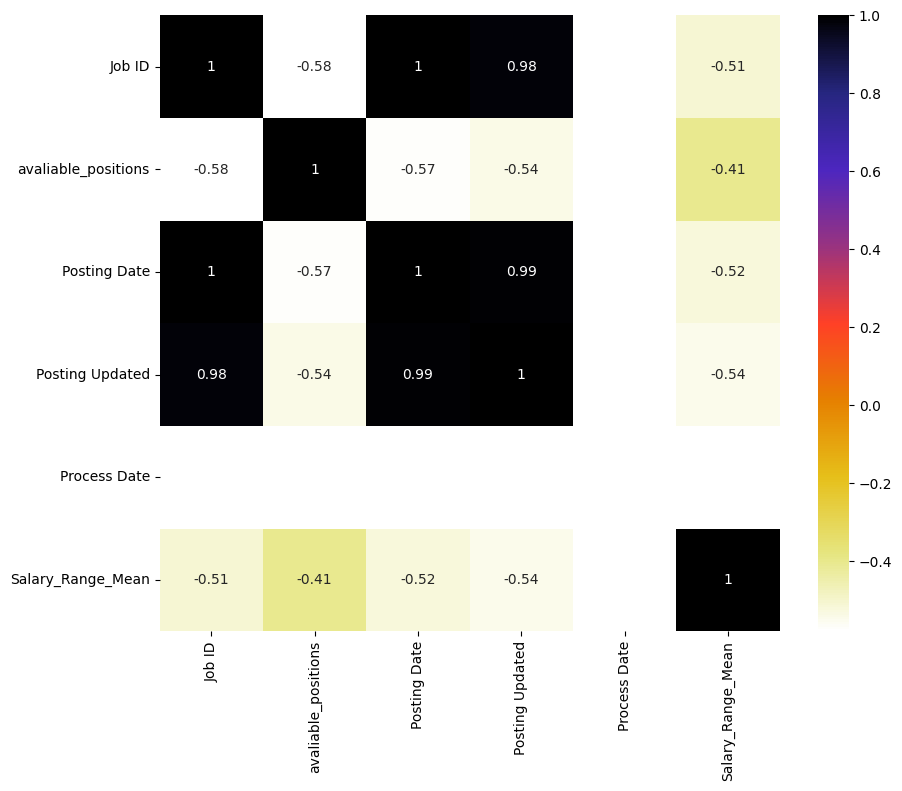

In [130]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),cmap=('CMRmap_r'),annot=True)
plt.show()

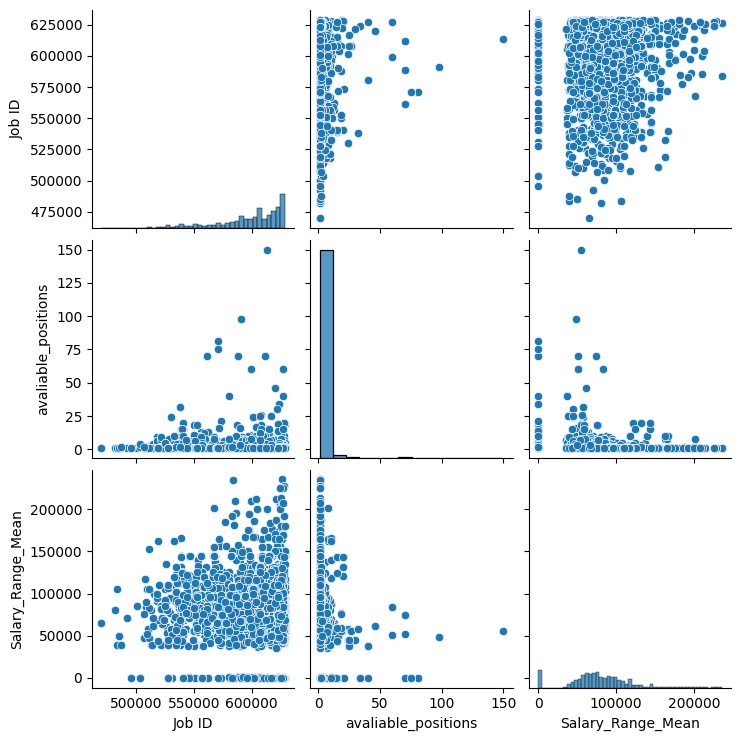

In [131]:
sns.pairplot(data=df)

In [132]:
df.head()

Job ID                         Agency Posting Type  avaliable_positions  \
0  623668  Dept of health/mental hygiene     External                    1   
1  608193  Dept of design & construction     Internal                    1   
2  625094  Dept of design & construction     Internal                    1   
3  580593   Department of transportation     External                    1   
4  624937  Dept of health/mental hygiene     External                    1   

                                      Business Title  \
0  Research Analyst, Imat, Bureau Of Maternal Inf...   
1                                    Deputy Director   
2                             Senior Project Manager   
3                              Procurement Analyst 2   
4  Deputy Director, Hiv Planning Council, Divisio...   

              Civil Service Title Title Classification Title Code No Level  \
0         City Research Scientist      Non-Competitive         21744    02   
1  Administrative Project Manager          Competitive         8300B    00   
2  Administrative Project Manager          Competitive         8300B    00   
3             Procurement Analyst          Competitive         12158    02   
4         City Research Scientist      Non-Competitive         21744    03   

                                        Job Category  ...  \
0  Constituent Services & Community Programs Heal...  ...   
1  Policy, Research & Analysis Public Safety, Ins...  ...   
2              Engineering, Architecture, & Planning  ...   
3                 Finance, Accounting, & Procurement  ...   
4  Constituent Services & Community Programs Heal...  ...   

                                     Job Description  \
0  established in 1805 the new york city departme...   
1  hours fulltime  35 hours work location 3030 th...   
2  hours fulltime  35 hours work location 3030 th...   
3  reporting directly to the director of bridge r...   
4  established in 1805 the new york city departme...   

                           Minimum Qual Requirements  \
0  1  For Assignment Level I only physical biolog...   
1  1 A baccalaureate degree from an accredited co...   
2  1 A baccalaureate degree from an accredited co...   
3  1 A baccalaureate degree from an accredited co...   
4  1  For Assignment Level I only physical biolog...   

                                    Preferred Skills  \
0  experience in quantitative research methods an...   
1  candidates must have excellent management skil...   
2  candidates should have at least six years of e...   
3  familiar with and knowledge of procurement sys...   
4  at least five years work experience in the hiv...   

                              Additional Information  \
0  IMPORTANT NOTES TO ALL CANDIDATES  Please note...   
1  Authorization to work in the United States is ...   
2  Authorization to work in the United States is ...   
3  The City of New York is an inclusive equal opp...   
4  Authorization to work in the United States is ...   

                                            To Apply  \
0  Apply online with a cover letter to httpsa127j...   
1  For City Employees please go to Employee Self ...   
2                         Click the Apply Now button   
3  Resumes may be submitted electronically using ...   
4  Apply online with a cover letter to httpsa127j...   

                               Residency Requirement Posting Date  \
0  new york city residency is generally required ...   2024-01-23   
1  new york city residency is not required for th...   2023-10-03   
2  new york city residency is not required for th...   2024-02-01   
3  new york city residency is generally required ...   2023-04-04   
4  new york city residency is generally required ...   2024-02-06   

  Posting Updated Process Date Salary_Range_Mean  
0      2024-01-23   2024-03-04           88694.0  
1      2023-11-29   2024-03-04           96626.0  
2      2024-02-01   2024-03-04           75043.5  
3      2023-04-04   2024-03-04           66851.0  
4     

In [133]:
df.isna().sum()

Job ID                       0
Agency                       0
Posting Type                 0
avaliable_positions          0
Business Title               0
Civil Service Title          0
Title Classification         0
Title Code No                0
Level                        0
Job Category                 0
Job_type                     0
Career Level                 0
Salary Frequency             0
Work Location                0
Division/Work Unit           0
Job Description              0
Minimum Qual Requirements    0
Preferred Skills             0
Additional Information       0
To Apply                     0
Residency Requirement        0
Posting Date                 0
Posting Updated              0
Process Date                 0
Salary_Range_Mean            0
dtype: int64

In [134]:
df=df.drop_duplicates()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5097 entries, 0 to 5119
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Job ID                     5097 non-null   int64         
 1   Agency                     5097 non-null   object        
 2   Posting Type               5097 non-null   object        
 3   avaliable_positions        5097 non-null   int64         
 4   Business Title             5097 non-null   object        
 5   Civil Service Title        5097 non-null   object        
 6   Title Classification       5097 non-null   object        
 7   Title Code No              5097 non-null   object        
 8   Level                      5097 non-null   object        
 9   Job Category               5097 non-null   object        
 10  Job_type                   5097 non-null   object        
 11  Career Level               5097 non-null   object        
 12  Salary Freq

# Salary_Range_Mean V/S  Agency



*   Based on the salary column, the best salaries provided by Dept of Environment Protection followed by Taxi & limousine commission.



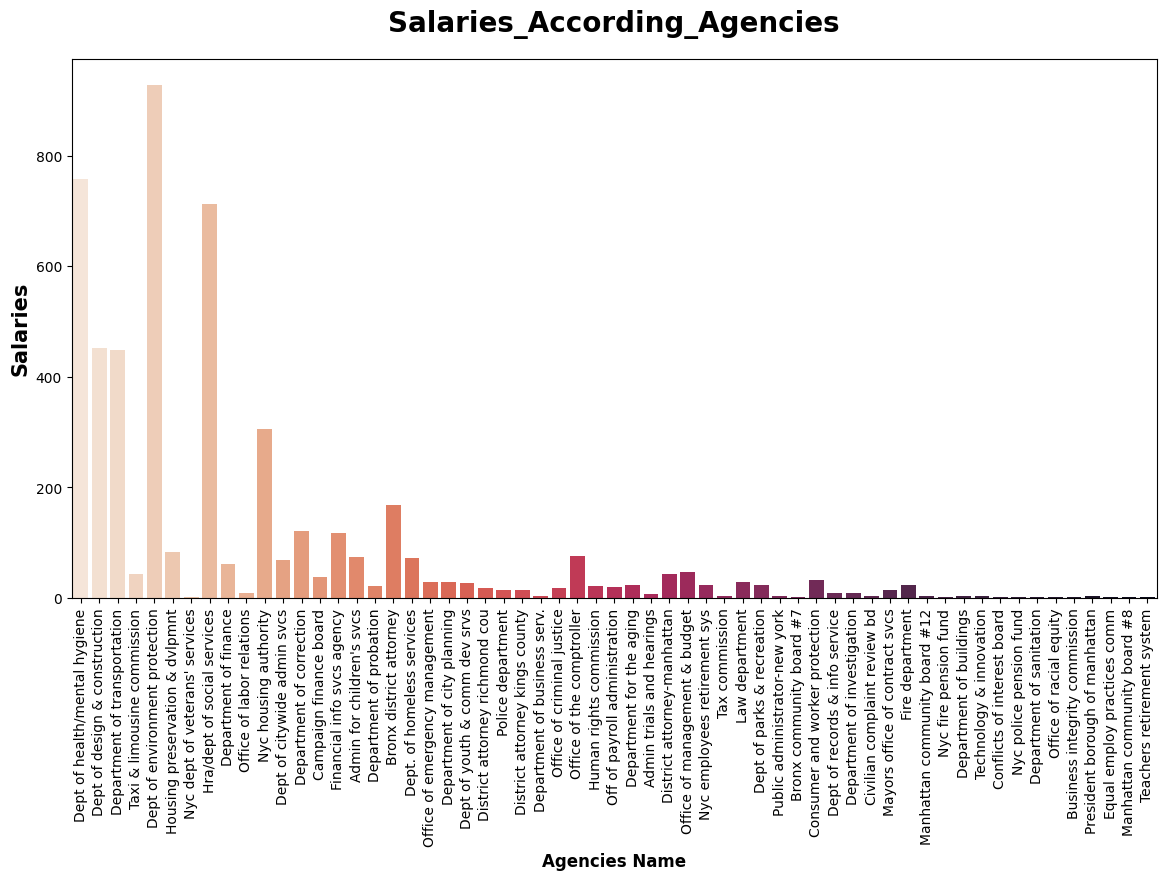

In [136]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Agency', data=df,palette="rocket_r")
plt.title("Salaries_According_Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Salaries", weight="bold", fontsize=15)
plt.xlabel("Agencies Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

In [137]:
df.groupby('Agency')['Salary_Range_Mean'].max().sort_values(ascending=False).head(10)

Agency
Dept of environment protection    235500.0
Taxi & limousine commission       227500.0
Department of correction          225000.0
Bronx district attorney           214000.0
Housing preservation & dvlpmnt    207000.0
Department of transportation      200000.0
Office of management & budget     185886.0
Nyc housing authority             184335.5
Dept. of homeless services        181495.5
Department of sanitation          180000.0
Name: Salary_Range_Mean, dtype: float64

# Salary_Range_Mean Vs Posting Type

* As we seen in columns **Internal**  &  **External**  salary_Range_mean both are same

In [ ]:
df.groupby('Posting Type')['Salary_Range_Mean'].mean().sort_values(ascending=False).head(10)

Posting Type
Internal    77737.979344
External    76782.700239
Name: Salary_Range_Mean, dtype: float64

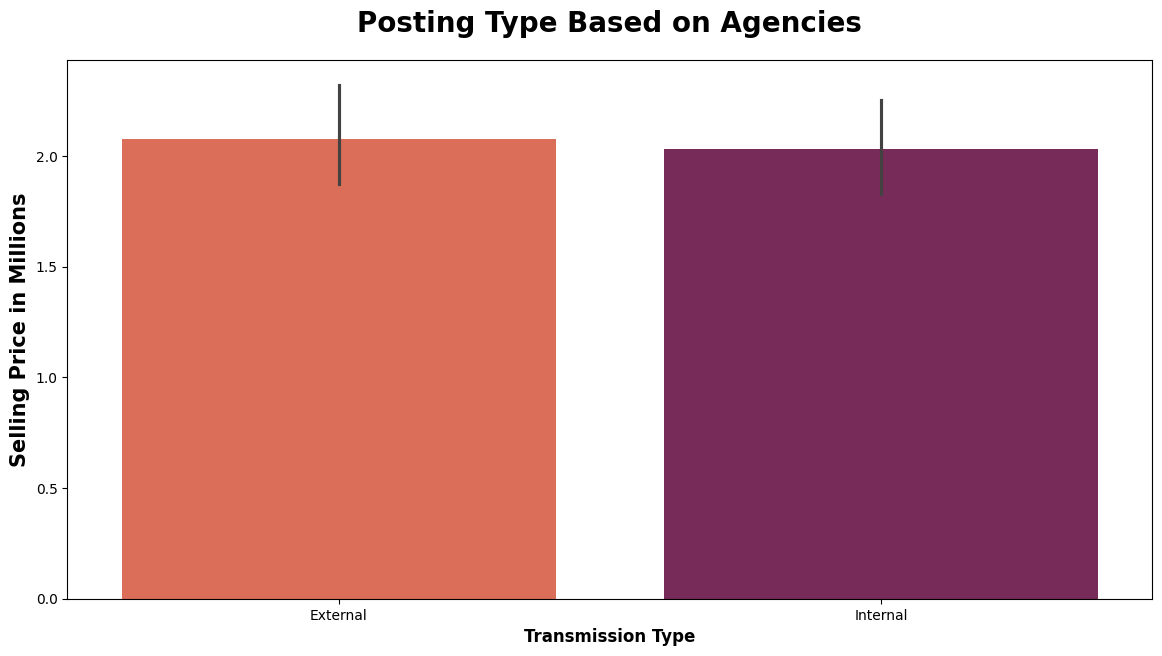

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(y='avaliable_positions',x='Posting Type', data=df,palette="rocket_r")
plt.title("Posting Type Based on Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

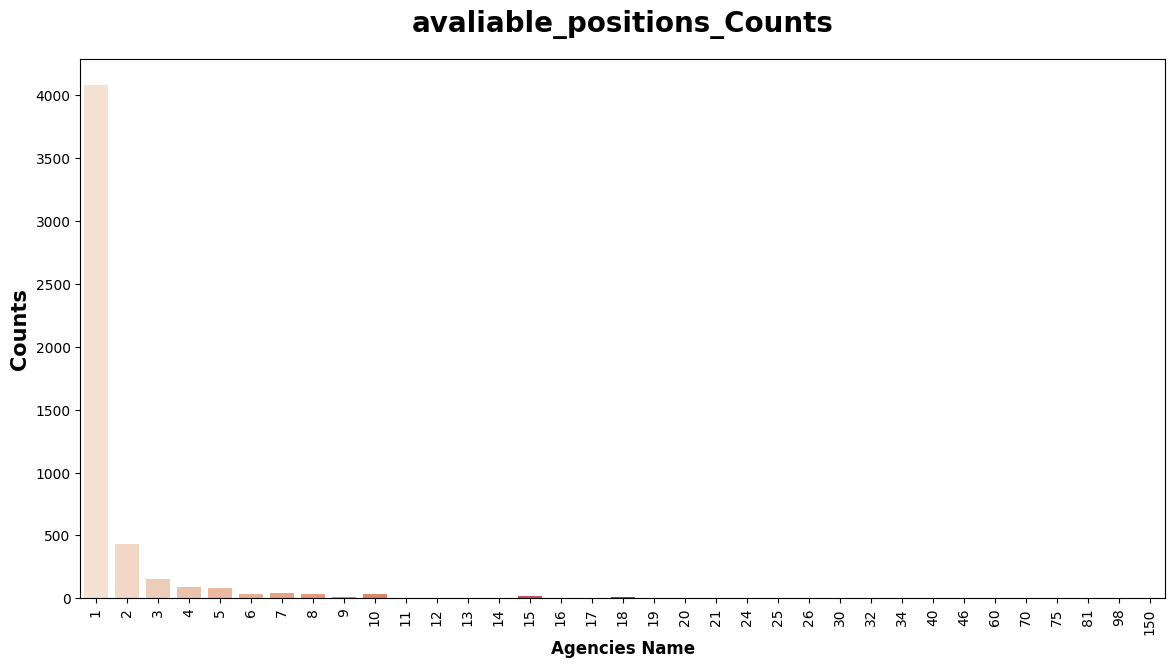

In [175]:
plt.subplots(figsize=(14,7))
sns.countplot(x='avaliable_positions', data=df,palette="rocket_r")
plt.title("avaliable_positions_Counts", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Agencies Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

# **Salary_Range_Mean** vs **Business Title**

**Report**


*   List item
*   List item



In [138]:
df.groupby('Business Title')['Salary_Range_Mean'].mean().sort_values(ascending=False).head(10)

Business Title
Deputy Commissioner, Bureau Of Customer Services                                 235500.0
Deputy Commissioner, Environmental Compliance                                    235000.0
First Deputy Commissioner                                                        227500.0
Deputy Commissioner, Training & Development                                      225000.0
Deputy Commissioner, Custody Management, Classification & Facility Operations    225000.0
Bureau Chief Of Recruitment                                                      214000.0
Deputy Commissioner, General Counsel                                             212500.0
Chief Surgeon, Health Management Division                                        210000.0
Deputy Commissioner, Chief Information Officer                                   210000.0
Chief Human Resources Officer                                                    207500.0
Name: Salary_Range_Mean, dtype: float64

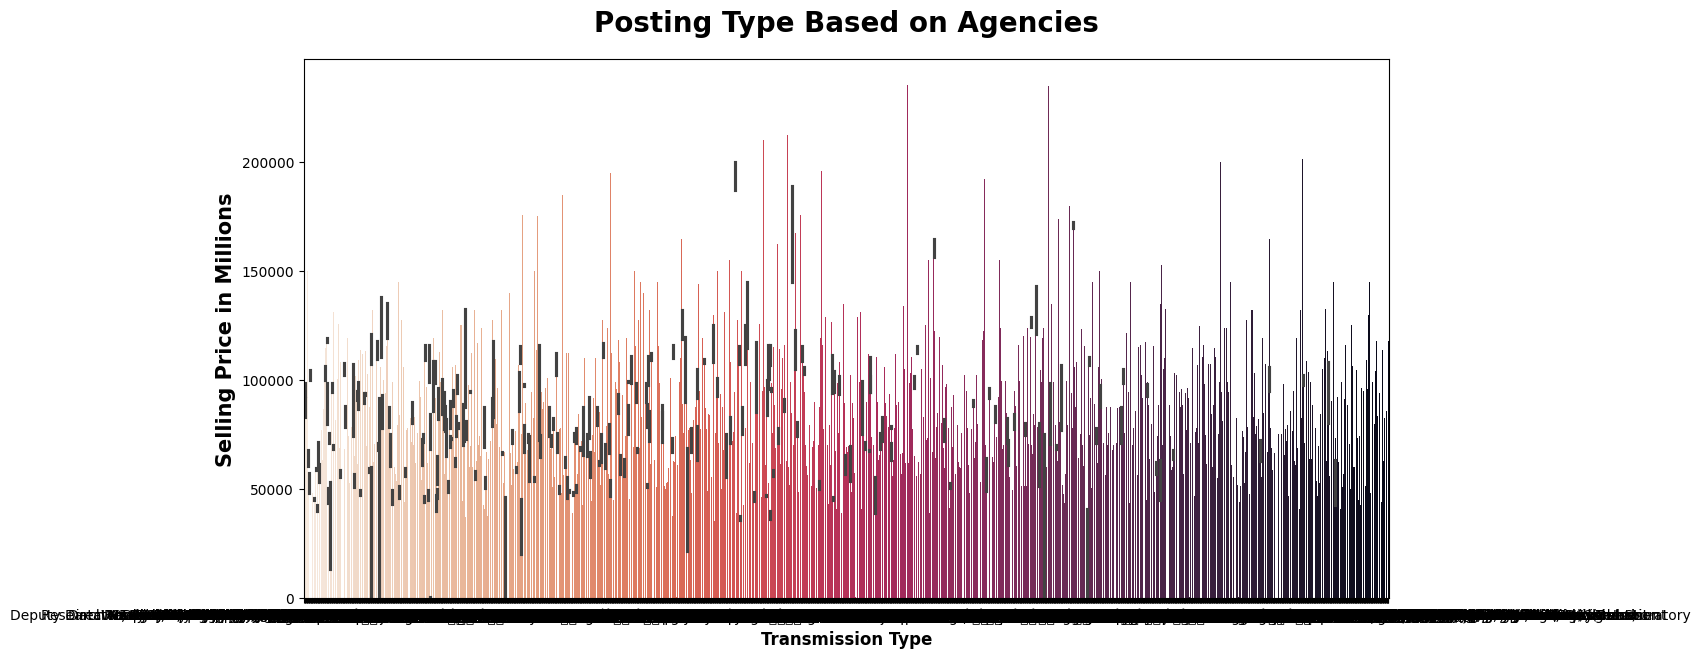

In [139]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Business Title',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Posting Type Based on Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

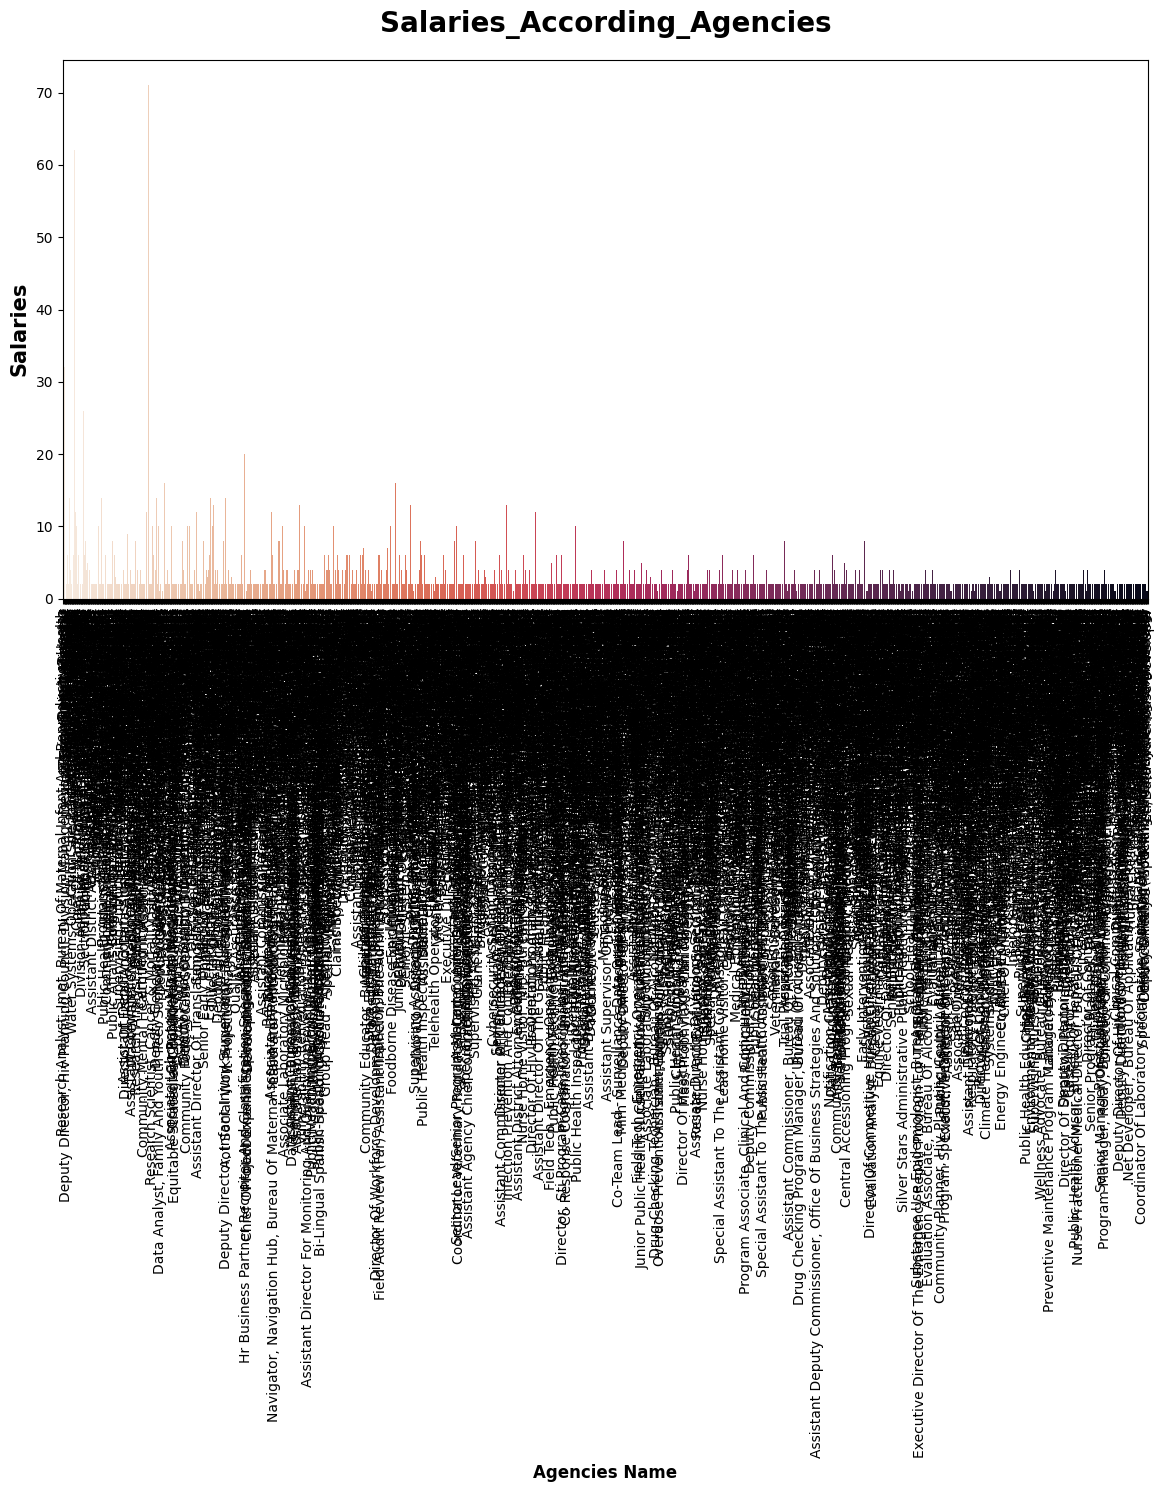

In [173]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Business Title', data=df,palette="rocket_r")
plt.title("Salaries_According_Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Salaries", weight="bold", fontsize=15)
plt.xlabel("Agencies Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

# **Civil Service Title** vs **Salary_Range_Mean**

**Report**

-

In [143]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'avaliable_positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category', 'Job_type', 'Career Level',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'Salary_Range_Mean'],
      dtype='object')

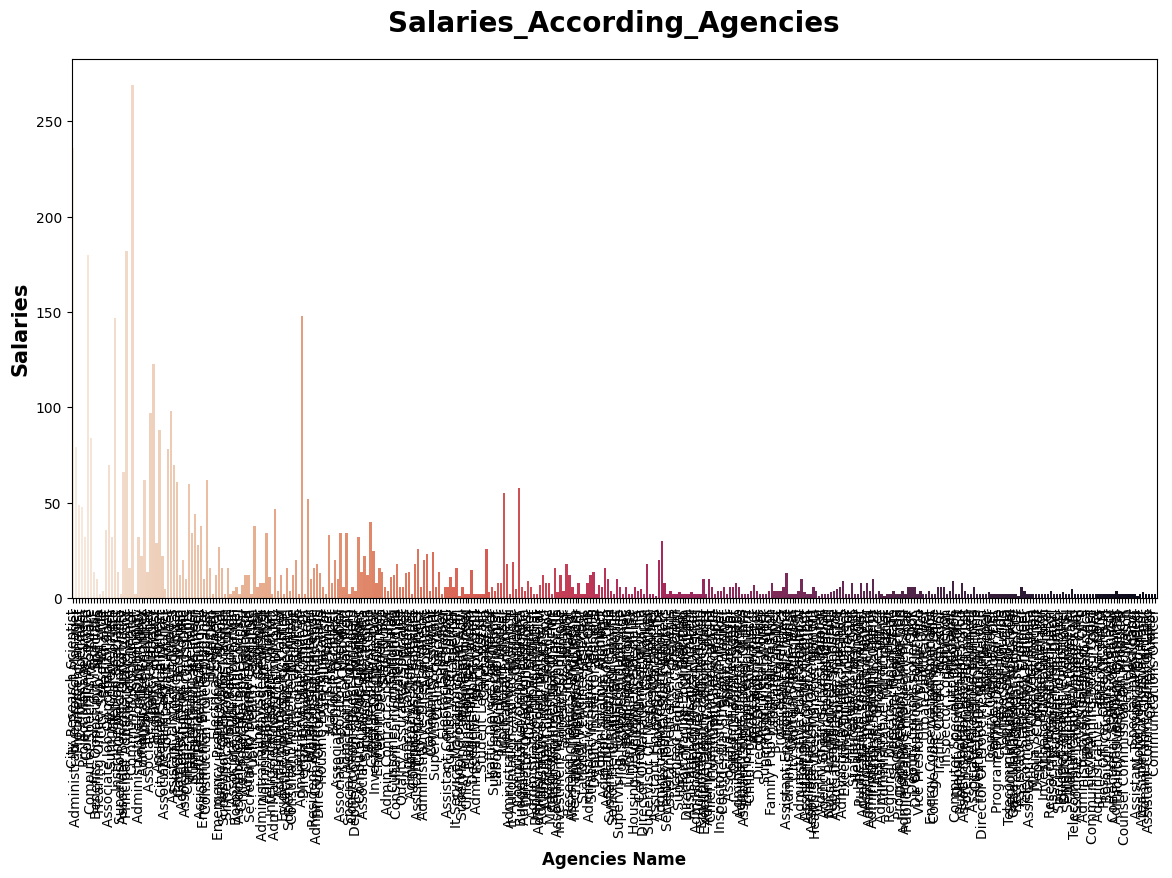

In [142]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Civil Service Title', data=df,palette="rocket_r")
plt.title("Salaries_According_Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Salaries", weight="bold", fontsize=15)
plt.xlabel("Agencies Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

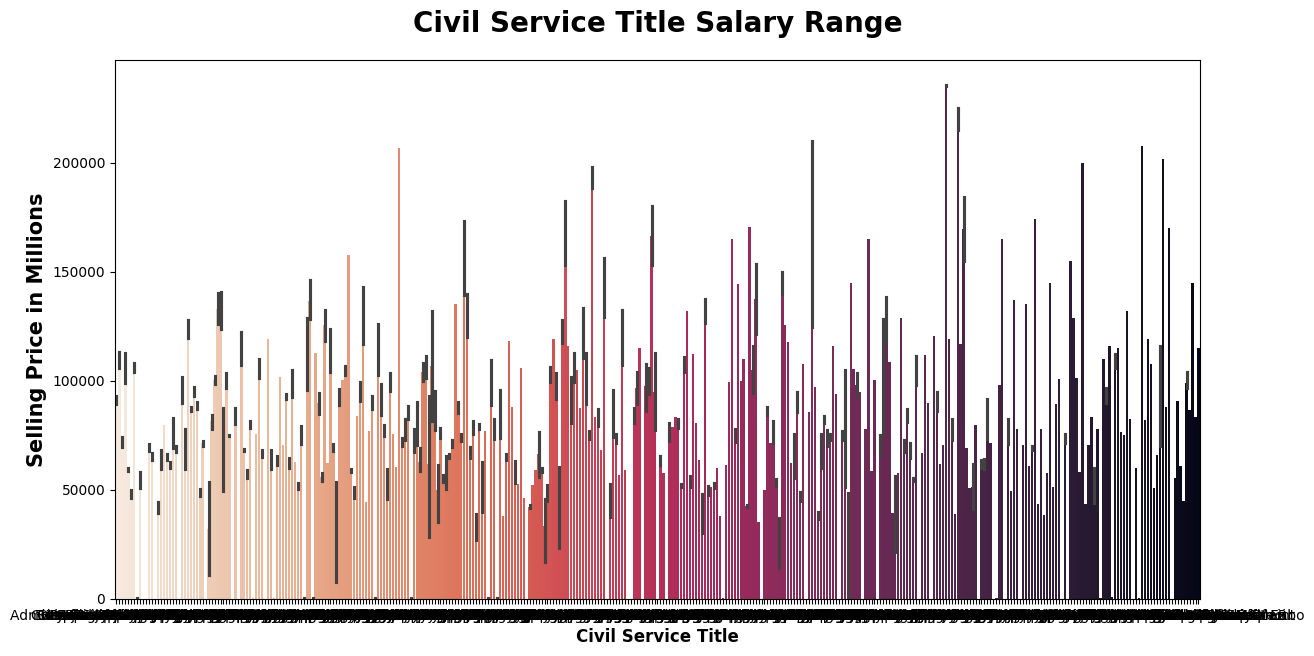

In [172]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Civil Service Title',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Civil Service Title Salary Range", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Civil Service Title", weight="bold", fontsize=12)
plt.show()

# **Title Classification** vs **Salary_Range_Mean**

**Report**

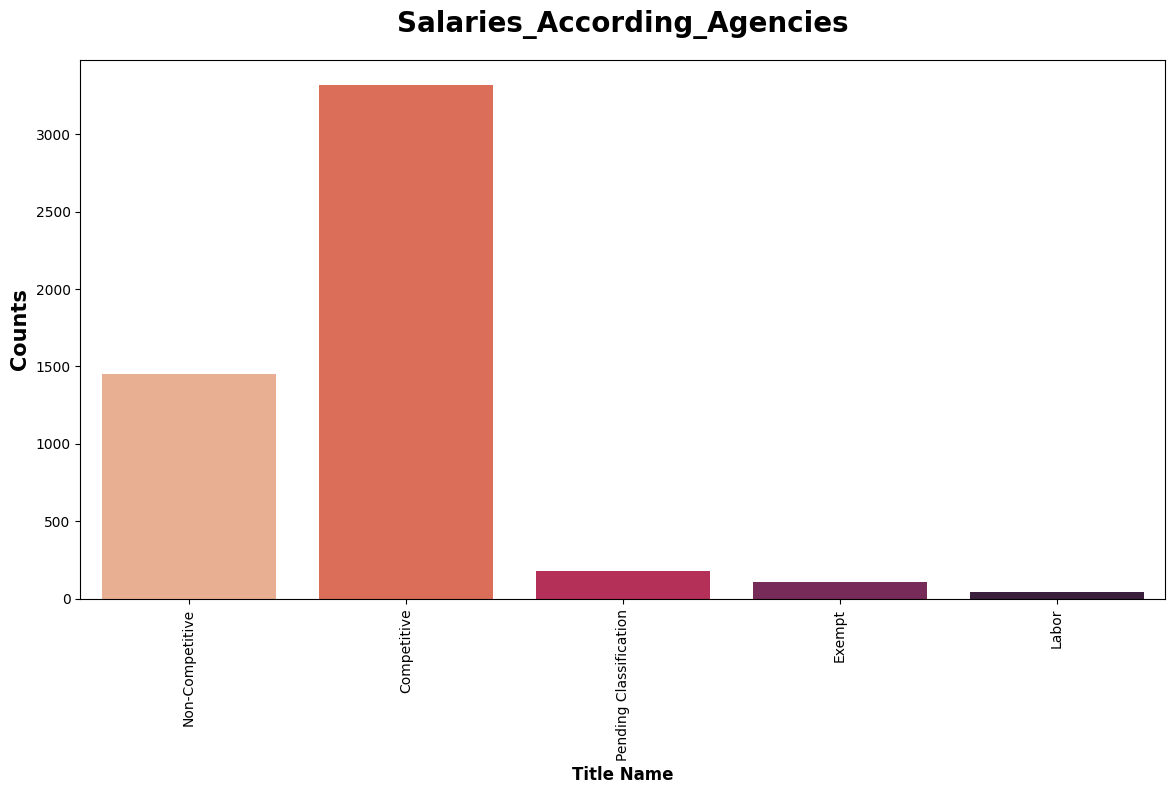

In [149]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Title Classification', data=df,palette="rocket_r")
plt.title("Salaries_According_Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Title Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

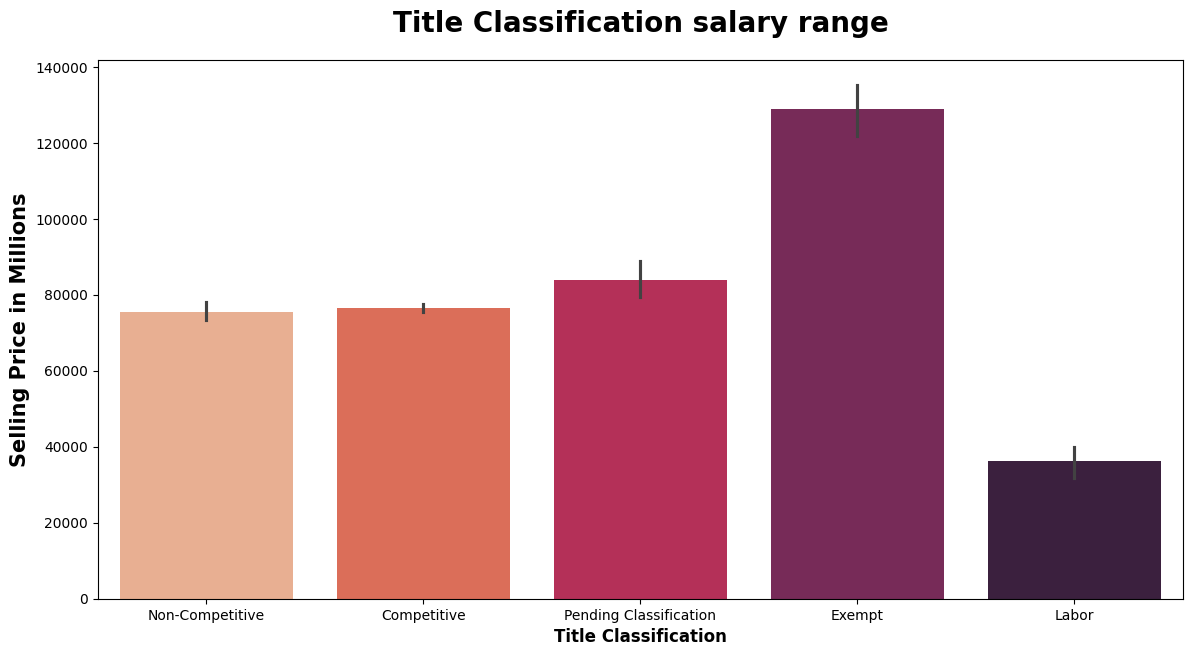

In [171]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Title Classification',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Title Classification salary range", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Title Classification", weight="bold", fontsize=12)
plt.show()

# **Level** vs **Salary_Range_Mean**

**Report**

In [150]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'avaliable_positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category', 'Job_type', 'Career Level',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'Salary_Range_Mean'],
      dtype='object')

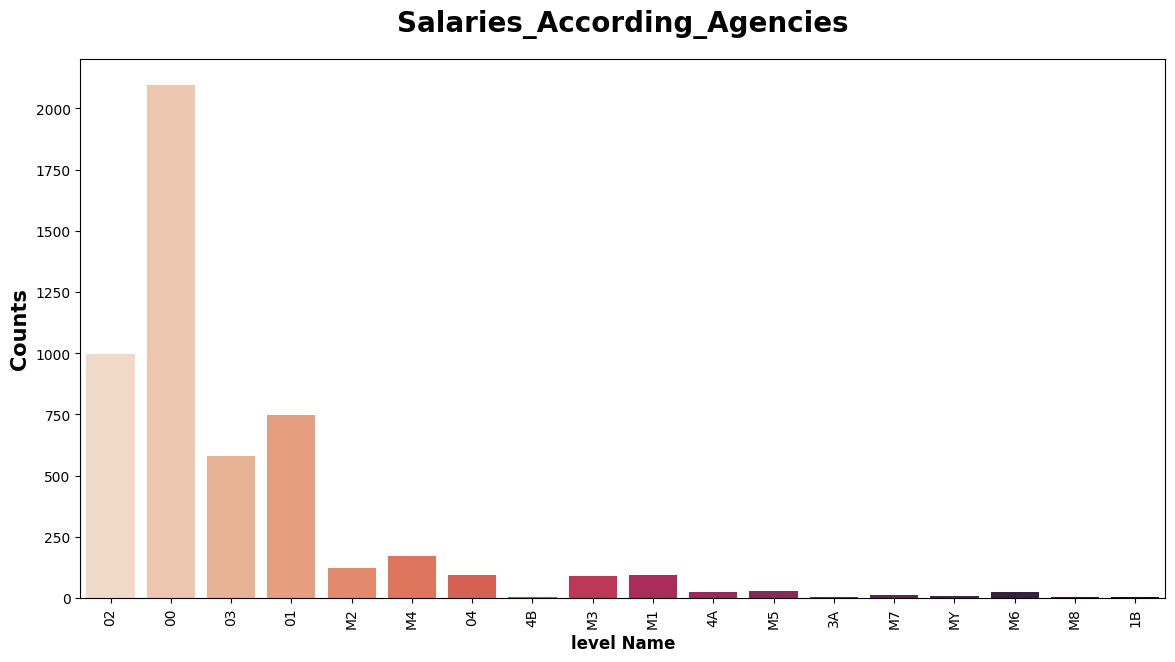

In [154]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Level', data=df,palette="rocket_r")
plt.title("Salaries_According_Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("level Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

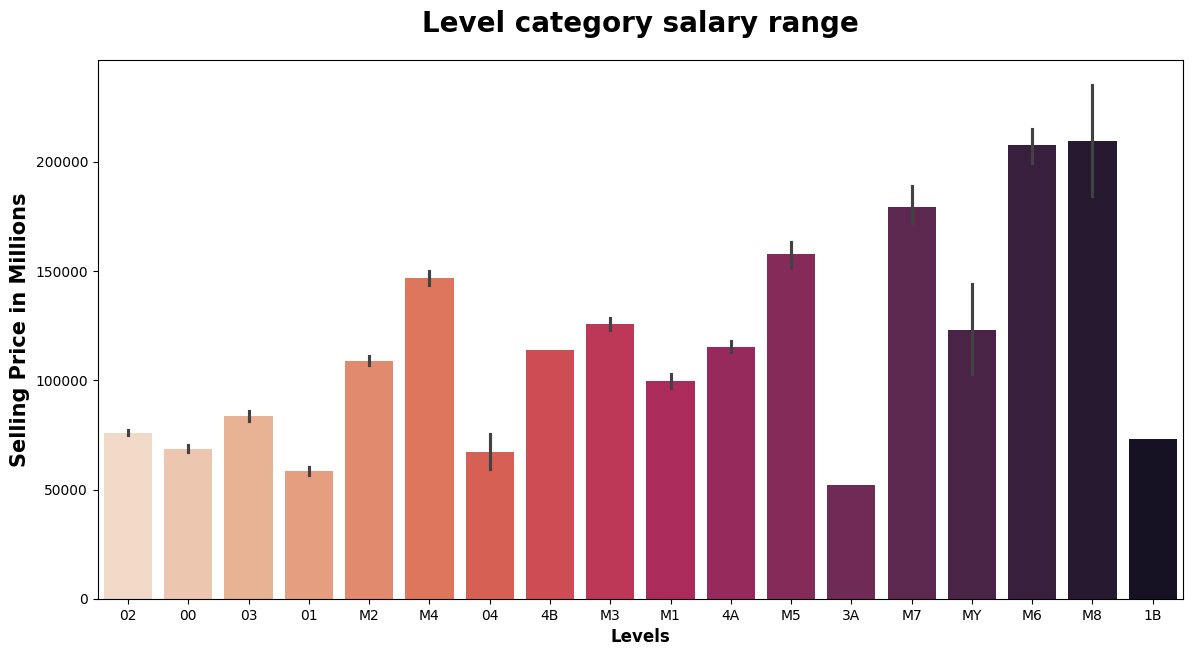

In [170]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Level',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Level category salary range", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Levels", weight="bold", fontsize=12)
plt.show()

# **Job category** vs **Salary_Range_Mean**

**Report**

In [152]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'avaliable_positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category', 'Job_type', 'Career Level',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'Salary_Range_Mean'],
      dtype='object')

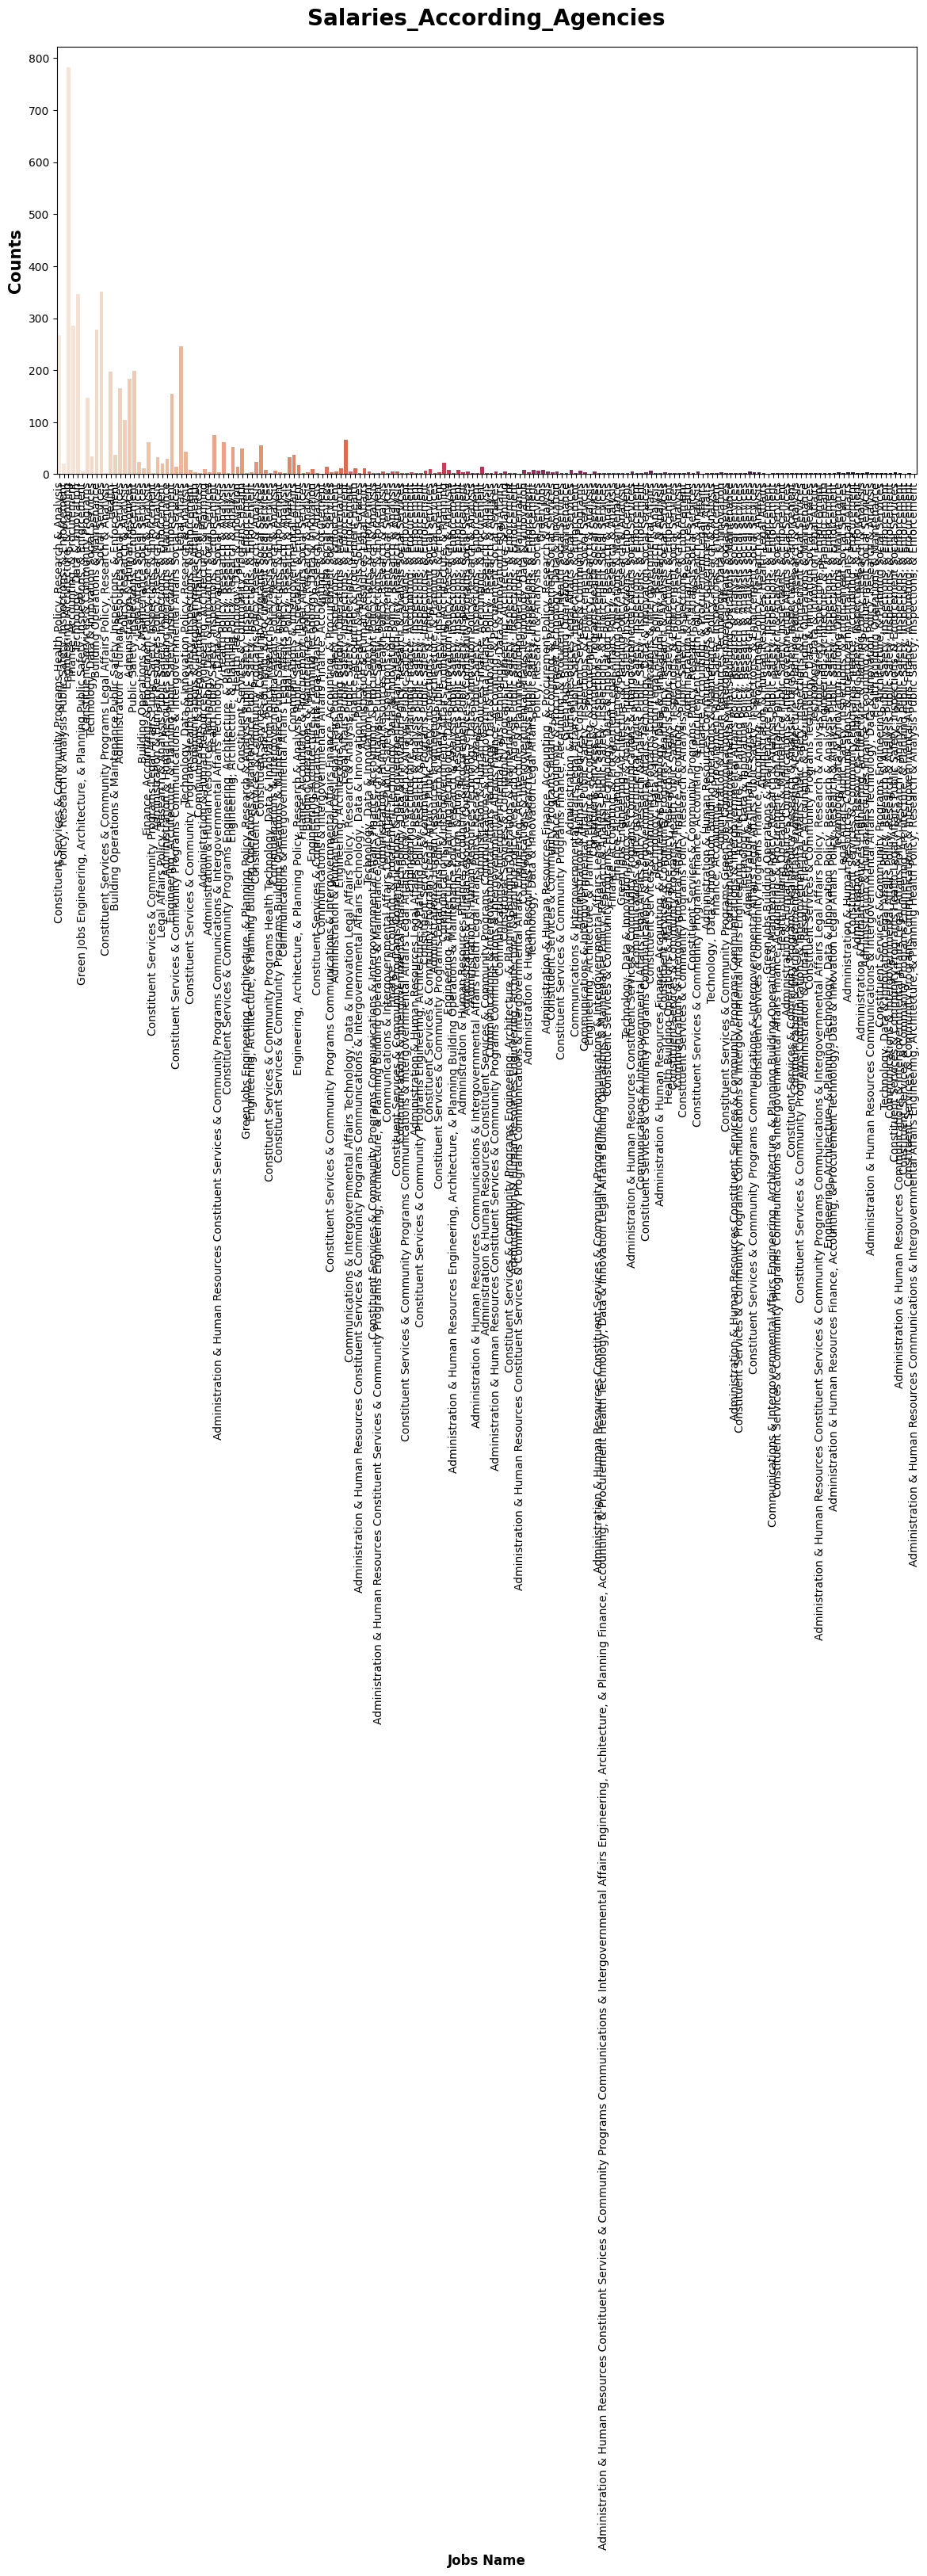

In [153]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Job Category', data=df,palette="rocket_r")
plt.title("Salaries_According_Agencies", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Jobs Name", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

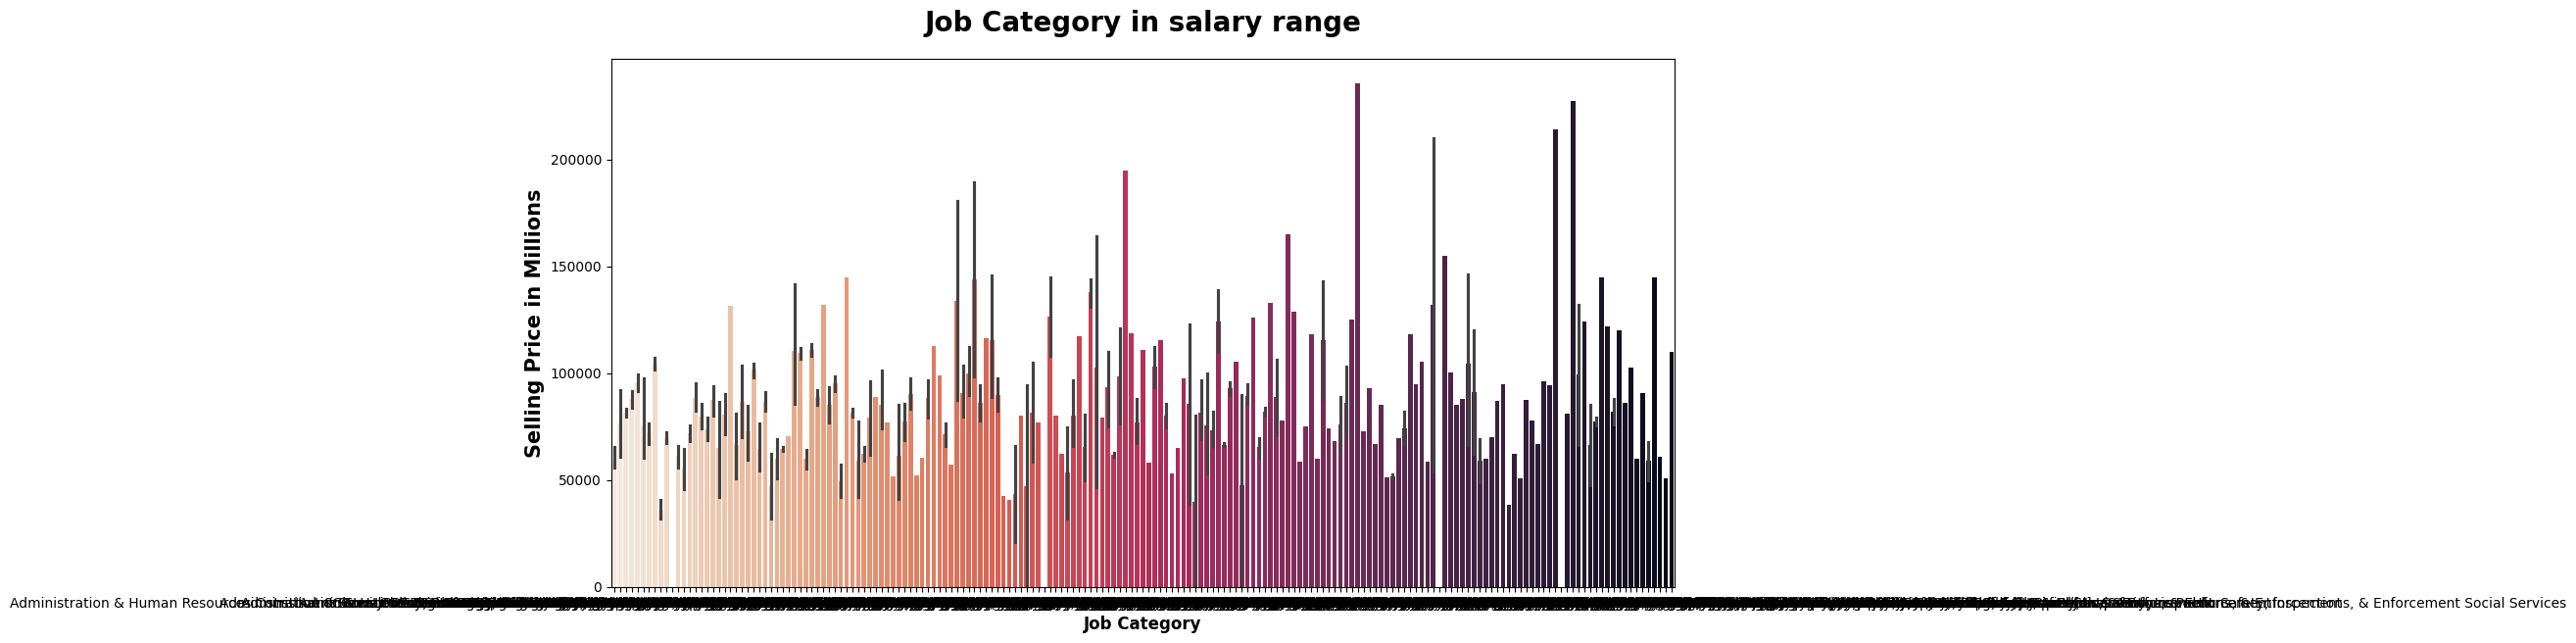

In [168]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Job Category',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Job Category in salary range", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Job Category", weight="bold", fontsize=12)
plt.show()

# **Job Type**

In [155]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'avaliable_positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category', 'Job_type', 'Career Level',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'Salary_Range_Mean'],
      dtype='object')

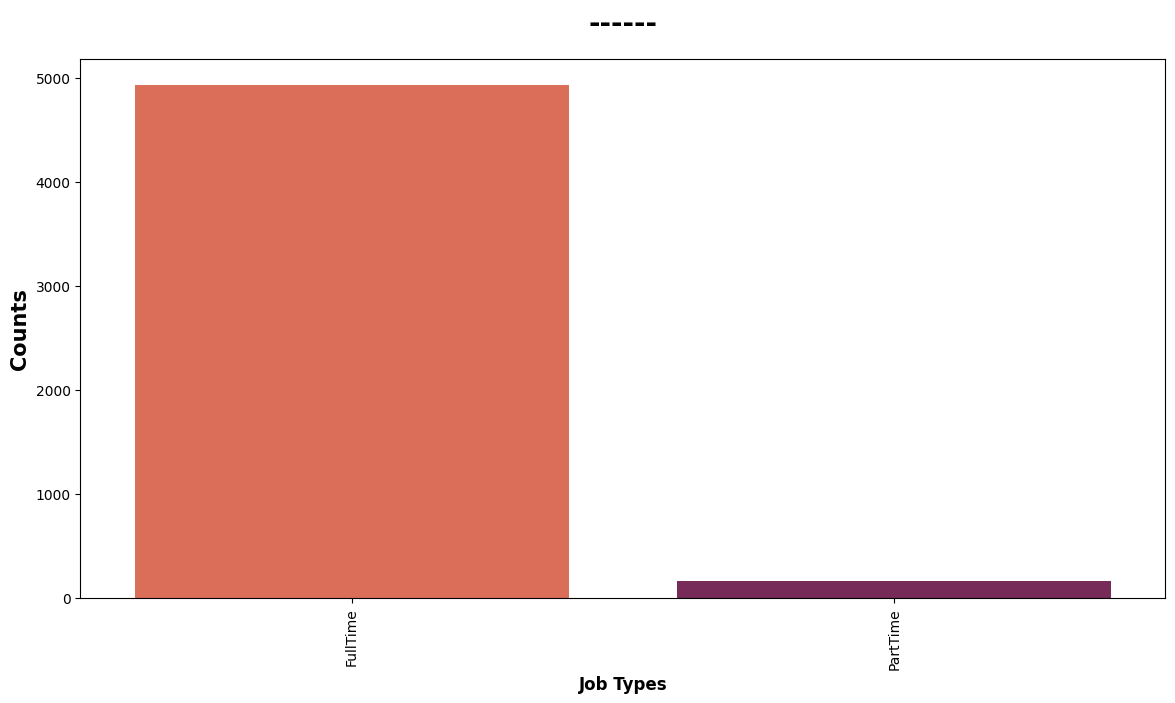

In [157]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Job_type', data=df,palette="rocket_r")
plt.title("------", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Job Types", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

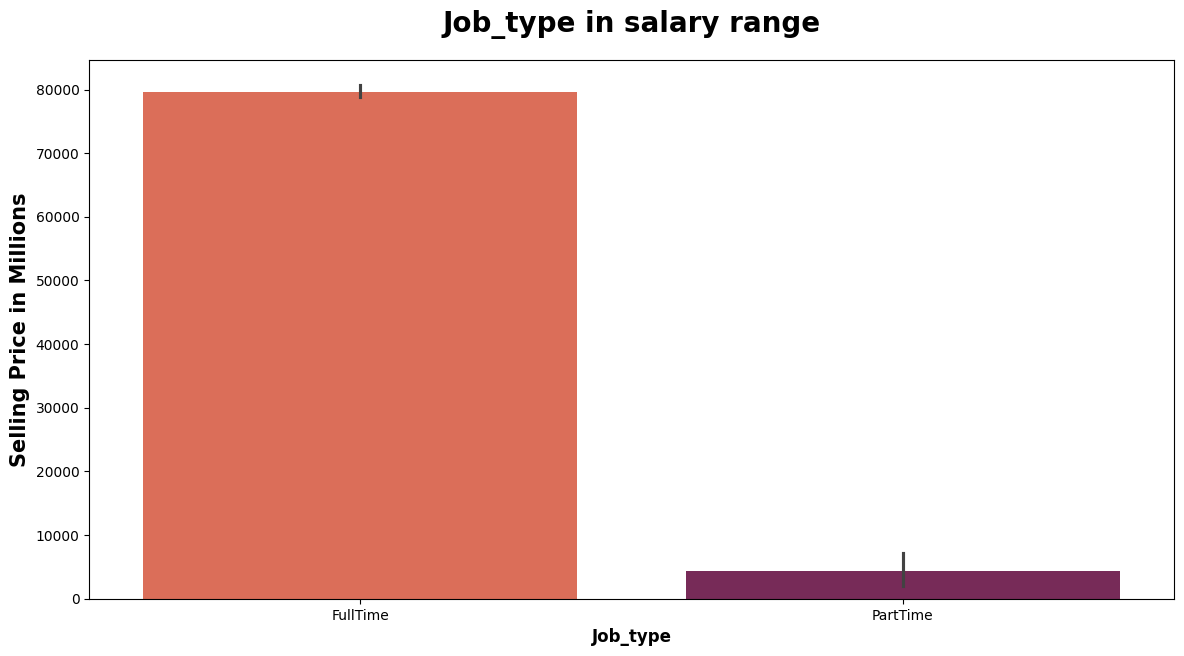

In [167]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Job_type',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Job_type in salary range", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Job_type", weight="bold", fontsize=12)
plt.show()

# **Career Level**

In [158]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'avaliable_positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category', 'Job_type', 'Career Level',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'Salary_Range_Mean'],
      dtype='object')

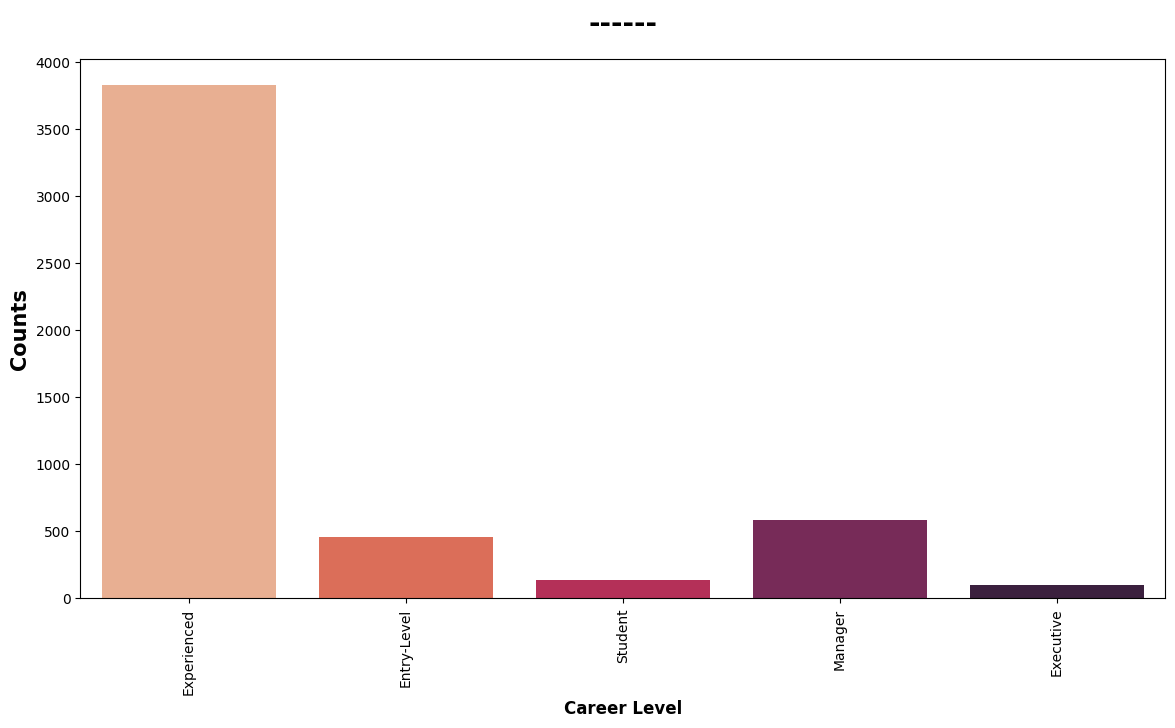

In [160]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Career Level', data=df,palette="rocket_r")
plt.title("------", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Career Level", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

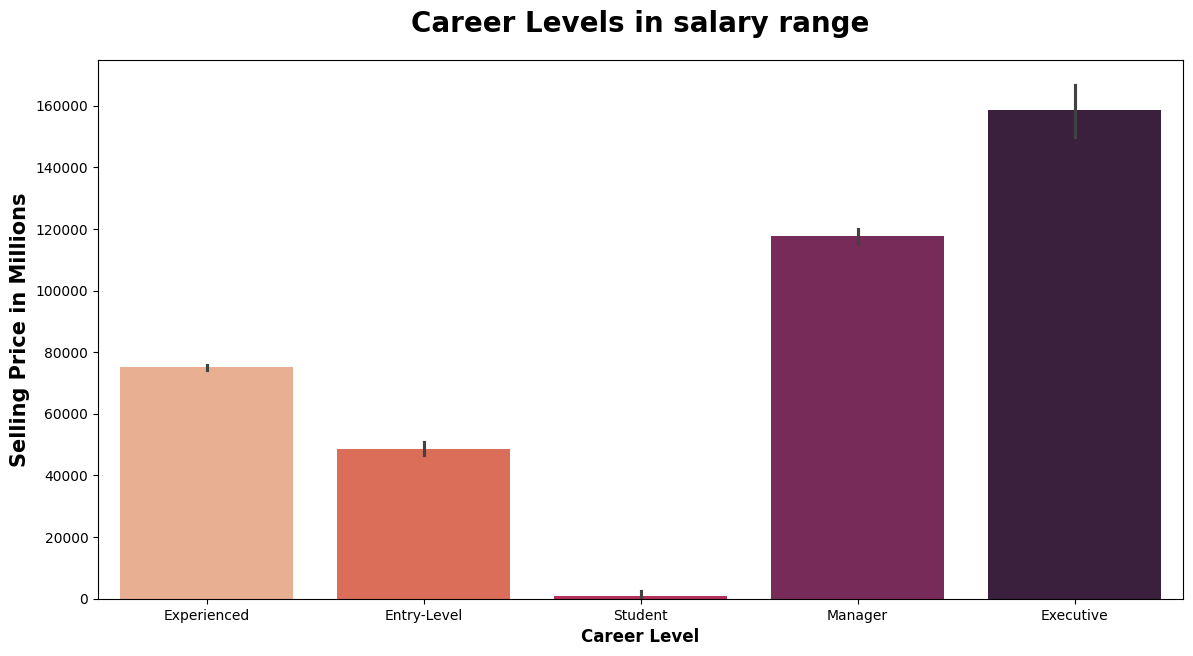

In [165]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Career Level',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Career Levels in salary range", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Career Level", weight="bold", fontsize=12)
plt.show()

# **Salary Frequency** vs

In [161]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'avaliable_positions',
       'Business Title', 'Civil Service Title', 'Title Classification',
       'Title Code No', 'Level', 'Job Category', 'Job_type', 'Career Level',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'Salary_Range_Mean'],
      dtype='object')

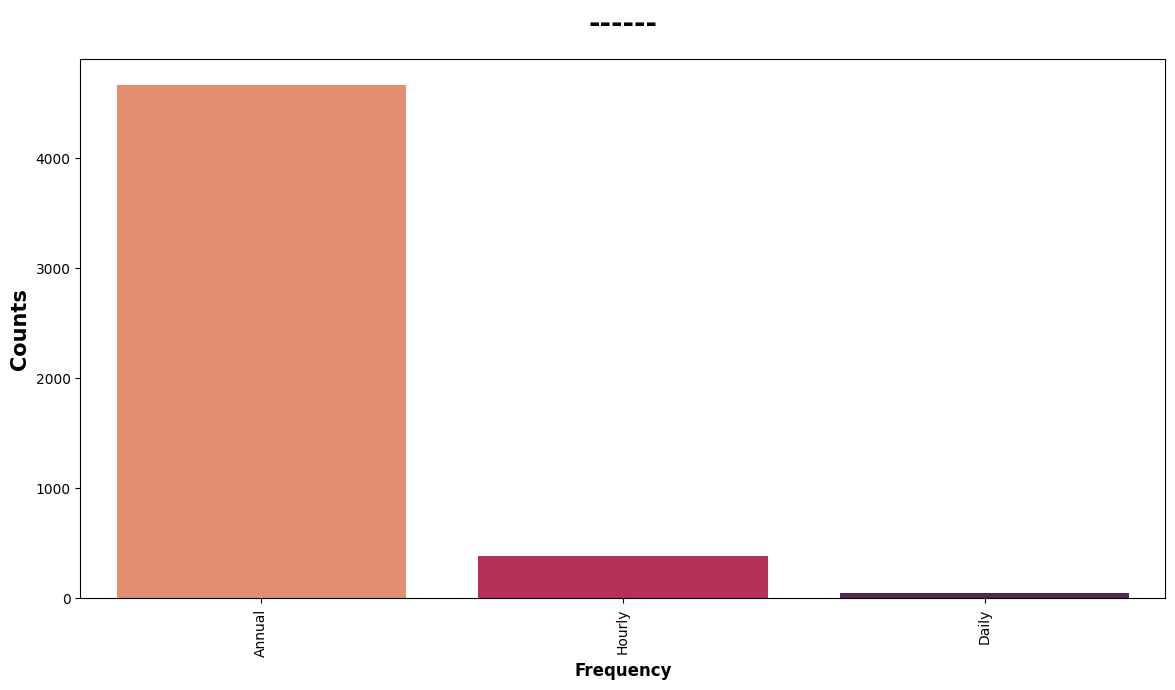

In [162]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Salary Frequency', data=df,palette="rocket_r")
plt.title("------", weight="bold",fontsize=20, pad=20)
plt.ylabel("Counts", weight="bold", fontsize=15)
plt.xlabel("Frequency", weight="bold", fontsize=12)

plt.xticks(rotation=90)
plt.show()

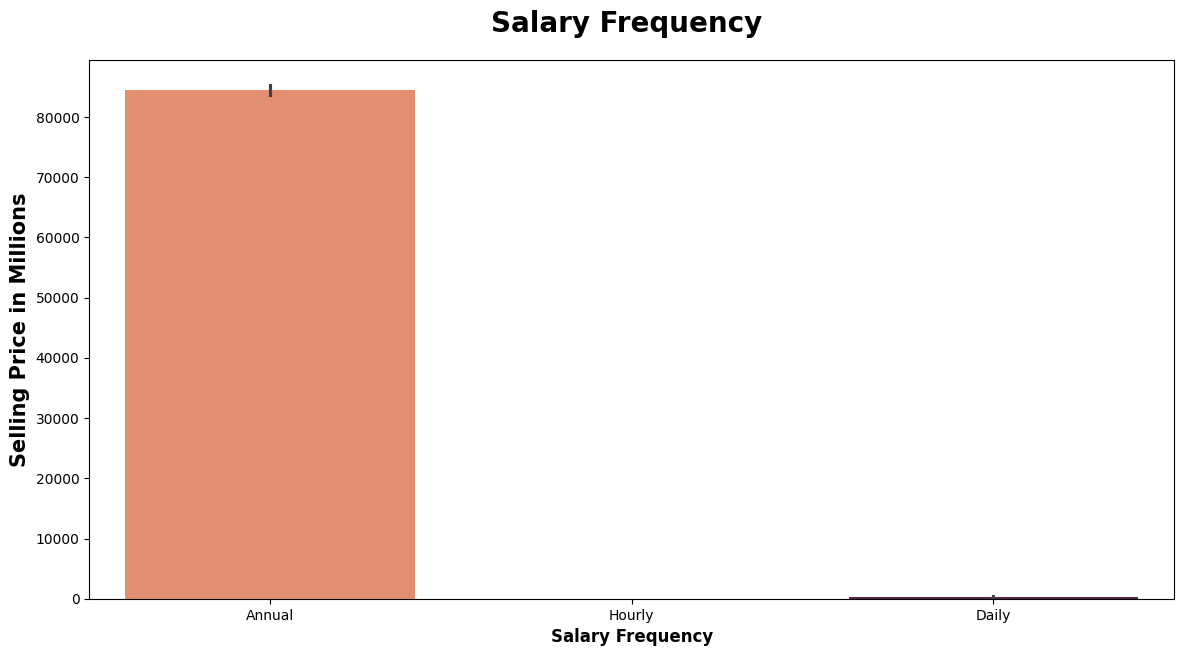

In [164]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Salary Frequency',y='Salary_Range_Mean', data=df,palette="rocket_r")
plt.title("Salary Frequency ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Salary Frequency", weight="bold", fontsize=12)
plt.show()

In [177]:
df.to_csv("cleanned salary price prediction.csv")